<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2024/25 Term 2
</div>

# CS105 Group Project Submission (Final)

-----

Provide your team details, including section, team number, team members, and the name of the dataset. 
Complete all of the following sections. For any part requiring code to derive your answers, please create a code cell immediately below your response and run the code.
To edit any markdown cell, double click the cell; after editing, execute the markdown cell to collapse it.

Include both Part I and Part II to produce a self-contained notebook. You may fine-tune Part I codes and/or findings based on feedback received on Part I submission.

-----

## Declaration

<span style="color:red">By submitting this notebook, we declare that **no part of this submission is generated by any AI tool**. We understand that AI-generated submissions will be considered as plagiarism, and just like other plagirisum cases, disciplinary actions will be imposed.</span>

#### Section:   G5
#### Team:      T1
#### Members:
1. Zachary Tay
2. Bryan Lee
3. Ang Qi Long
4. Jonathan Wong
5. Swayam Jain

#### Dataset: Employee

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import math
import seaborn as sns

df = pd.read_csv('employee.csv')

<a id="menu"></a>
### Table of Content

#### [Part 1: EDA](#phase1)
1. [Overview of Dataset](#part1)
2. [Data Pre-processing](#part2)
3. [Exploratory Analysis and Visualization](#part3)
#### [Part 2: Modeling](#phase2)
1. [Problem Formulation](#part4)
2. [Model Training](#part5)
3. [Model Evaluation and Selection](#part6)
4. [Findings and Conclusion](#part7)
5. [Non-technical Protocol](#part8)

<a id="phase1"></a>
## Part I: Exploratory Data Analysis (EDA) [8% of final grade]

<a id="part1"></a>
### 1. Overview of dataset [15% of Part I]
a. [Background](#part1a) <br>
b. [Size](#part1b) <br>
c. [Variables](#part1c)

_[(Back Top)](#menu)_

#### **a.** Summarise the background of the dataset [limited to 50 words]

<div style="text-align: justify;">
This dataset contains <b>HR data of all employees under a sales team</b>. The data includes <b>personal and employment details</b>, <b>total career sales acquired</b> and <b>latest quarterly rating</b>. An employee’s data is <b>captured at the beginning of each month</b>, either <b>up to the latest month</b> (Dec 2017) or <b>when they quit</b>.
</div>


#### **b.** State the size of the dataset <a id="part1b"></a>

**Size**
- **Rows**: 2381
- **Columns**: 13


In [211]:
n_rows, n_cols = df.shape
print(f"{n_rows} Rows")
print(f"{n_cols} Columns")

2381 Rows
13 Columns


[(Back)](#part1)

#### **c.** For each variable, describe what it represents and its data type (numerical or categorical) <a id="part1c"></a> 

**Date**
- **Type**: Categorical (Ordinal)<br>
- **Info**: The date when an employee's data is recorded 

**Emp_ID**
- **Type**: Categorical (Nominal)<br>
- **Info**: The unique ID of an employee

**Age**
- **Type**: Numerical (Discrete)<br>
- **Info**: The age of an employee
  
**Gender**
- **Type**: Categorical (Nominal)<br>
- **Info**: An employee’s gender (Male or Female)

**City**
- **Type**: Categorical (Nominal)<br>
- **Info**: The city where an employee works in (C1, C2, ..., C29)

**Education**
- **Type**: Categorical (Ordinal)<br>
- **Info**: Highest education of an employee (College, Bachelor, Master)

**Salary**
- **Type**: Numerical (Discrete)<br>
- **Info**: Current salary of an employee, excluding bonus 

**Join_Date**
- **Type**: Categorical (Ordinal)<br>
- **Info**: The date when an employee joins the company

**Last_Work_Date**
- **Type**: Categorical (Ordinal)<br>
- **Info**: The data when an employee leaves the company, otherwise empty if employee has not quit

**Join_Designation**
- **Type**: Categorical (Ordinal)<br>
- **Info**: Designation level when an employee joined the company (1, 2, 3, 4, 5)

**Designation**
- **Type**: Categorical (Ordinal)<br>
- **Info**: Current designation level of an employee (1, 2, 3, 4, 5)

**Total_Sales_Accquired**
- **Type**: Numerical (Discrete)<br>
- **Info**: Total sales generated by an employee since joining the team

**Quarterly_Rating**
- **Type**: Categorical (Ordinal)<br>
- **Info**: Last quarterly performance rating of an employee (1, 2, 3, 4)


[(Back)](#part1) <a id="part2"></a>

*****
### 2. Data pre-processing [35% of Part I]
a. [Missing Data](#part2a) <br>
b. [Outlier](#part2b) <br>
c. [Encoding](#part2c)                                   

_[(Back Top)](#menu)_

#### **a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made. <a id="part2a"></a> 

| Variable w/ Missing Data | Count | Percentage |
| :---------------- | :------: | ----: |
| Join_Date | 118 | 4.96% |
| Last_Work_Date | 765 | 32.13% |
| Join_Designation | 105 | 4.41% |  



In [212]:
def displayMissing() :
    missing_count = df.shape[0] - df.count()              # total rows - rows with non-null values
    missing_percent = (missing_count / df.shape[0] * 100) # missing rows / total rows

    missing_data = pd.DataFrame({'Count': missing_count, 'Percentage': round(missing_percent,2)})
    missing_data = missing_data[missing_data['Count'] > 0]  # filter out variable w/o missing data

    return missing_data

displayMissing()

,Count,Percentage
Join_Date,118,4.96
Last_Work_Date,765,32.13
Join_Designation,105,4.41


##### **Join Date**


- **Resolution**: Drop all rows with missing `Join_Date`
- **Reason**: As data of an employee is updated every month, there is no past record to check for their join date. We therefore cannot reasonably ascertain when they joined the sales team. Additionally, as the duration of employement will impact other variables and the percentage of missing data is not too high (4.96%), we opted to drop these rows with missing `Join_Date`
- **Assumption(s)**:
    - Each employee will only have one Emp_ID unique to them
    - An employee who had quit will not join the sales team again nor gain a new Emp_ID

In [213]:
df.dropna(subset=['Join_Date'], inplace = True)         # drop all rows with null values under Join_Date
displayMissing()                                        # Join_Date count is 0 (LWD & JD are affected)

,Count,Percentage
Last_Work_Date,728,32.17
Join_Designation,102,4.51


##### **Last Work Date**


- **Resolution**: For rows with missing `Last_Work_Date`,
    - If `Date` is before 1/12/2017, drop rows
    - If `Date` is 1/12/2017, impute rows with 31/12/2017
- **Reason**: 
    - For rows before Dec 2017, an older `Date` suggests that the employee is no longer with the sales team. The employee may quit on anyday within a given month and make any number of sales in that period too, thus affecting the other variables. As we again cannot reasonably ascertain when the employee quit and number of affected is not too high (24, 1.06%), we opted to drop these rows with missing 'Last_Work_Date`
    - For rows during Dec 2017, `Last_Work_Date` being blank indicates that the employee has not quit in that given month. As such, we can state that the date they last worked (or are employed) is 31 Dec 2017 and opted to impute with this date.
- **Assumption(s)**: 
    - There are no other employees will quit during Dec 2017 beyond those given in the dataset 

In [214]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

unknownLastDate = df[(df['Last_Work_Date'].isnull()) & (df['Date'] < '2017-12-01')].shape[0]
print("Unknown Last Date:", unknownLastDate, round(unknownLastDate / df.shape[0] * 100, 2), "%")

stillWorking = df[(df['Last_Work_Date'].isnull()) & (df['Date'] == '2017-12-01')].shape[0]
print("Still Working:", stillWorking, round(stillWorking / df.shape[0] * 100, 1), "%")

Unknown Last Date: 24 1.06 %
Still Working: 704 31.1 %


In [215]:
unknownLastDate = df[(df['Last_Work_Date'].isnull()) & (df['Date'] < '2017-12-01')]     # splice out rows where Date is before Dec 2017
df.drop(unknownLastDate.index, inplace=True)                                            # use index of unknownLastDate and drop row

df.fillna({"Last_Work_Date": "31/12/2017"}, inplace=True)                               # impute rows of employees still working with sales team
                                                                                        # with last day of month (31 Dec 2017)

displayMissing()                                                                        # Last_Work_Date is 0 (JD affected)

,Count,Percentage
Join_Designation,100,4.47


##### **Join Designation**


- **Resolution**: For rows with missing `Join_Designation`, 
    - If `Designation == 1`, impute rows with 1
    - If `Designation > 1`, drop these rows
- **Reason**: 
    - As `Designation` captures the current designation level of an employee when their data was recorded, if current designation level is 1, then we can definitvely deduce that the `Join_Designation` is 1 too. 
    - For any higher current designation level than 1, we again cannot reasonably ascertain their initial designation level as it likely varies with other variables. As the number and percentage of rows missing data where `Designation > 1`  is not too high (78, 3.48%), we opted to drop these rows and impute those where where `Designation == 1` is 1 (22, 0.983%) with 1  
- **Assumption(s)**: -  

In [216]:
cdIs1 = df[(df['Join_Designation'].isnull()) & (df['Designation'] == 1)].shape[0]
cdNot1 = df[(df['Join_Designation'].isnull()) & (df['Designation'] != 1)].shape[0]

print("(Current) Designation = 1:", cdIs1, round(cdIs1 / df.shape[0] * 100, 3), "%")
print("(Current) Designation > 1:", cdNot1, round(cdNot1 / df.shape[0] * 100, 2), "%")

(Current) Designation = 1: 22 0.983 %
(Current) Designation > 1: 78 3.48 %


In [217]:
cdNot1 = df[(df['Join_Designation'].isnull()) & (df['Designation'] != 1)]   # splice out rows where designation > 1
df.drop(cdNot1.index, inplace=True)                                         # use index of cdNot1 and drop row
# print(cdNot1.shape[0])

cdIs1 = df[(df['Join_Designation'].isnull()) & (df['Designation'] == 1)]    # splice out rows where designation is 1
# print(cdIs1.iloc[cdIs1[cdIs1["Emp_ID"]==21].index])
df.loc[cdIs1.index, "Join_Designation"] = 1                                 # use index of cdIs1 and impute row with 1
# print(cdIs1.shape[0])
# print(df.iloc[df[df["Emp_ID"]==21].index])

df['Join_Designation'] = df['Join_Designation'].astype(int)                 # convert imputed float (1.0) to int (1)
# print(df.iloc[df[df["Emp_ID"]==21].index])
displayMissing()                                                            # Join_Designation count is 0

,Count,Percentage


**Size after Cleaning**
- **Rows**: 2161
- **Columns**: 13

In [218]:
n_rows, n_cols = df.shape
print(f"{n_rows} Rows")
print(f"{n_cols} Columns")

2161 Rows
13 Columns


[(Back)](#part2)

#### **b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made. <a id="part2b"></a> 

##### **Age**


There exists 33 outlier rows with `Age` above upper bound.
- **Resolution**: Remove the row with the outlier with the employee of the oldest age.
- **Reason**: This outlier is siginficantly further away from the rest of the cluster
- **Assumption(s)**: 
    - An employee is not forced to quit or retire once they reach a certain age

Rows below lower bound (17): 0
Rows below upper bound (49): 33


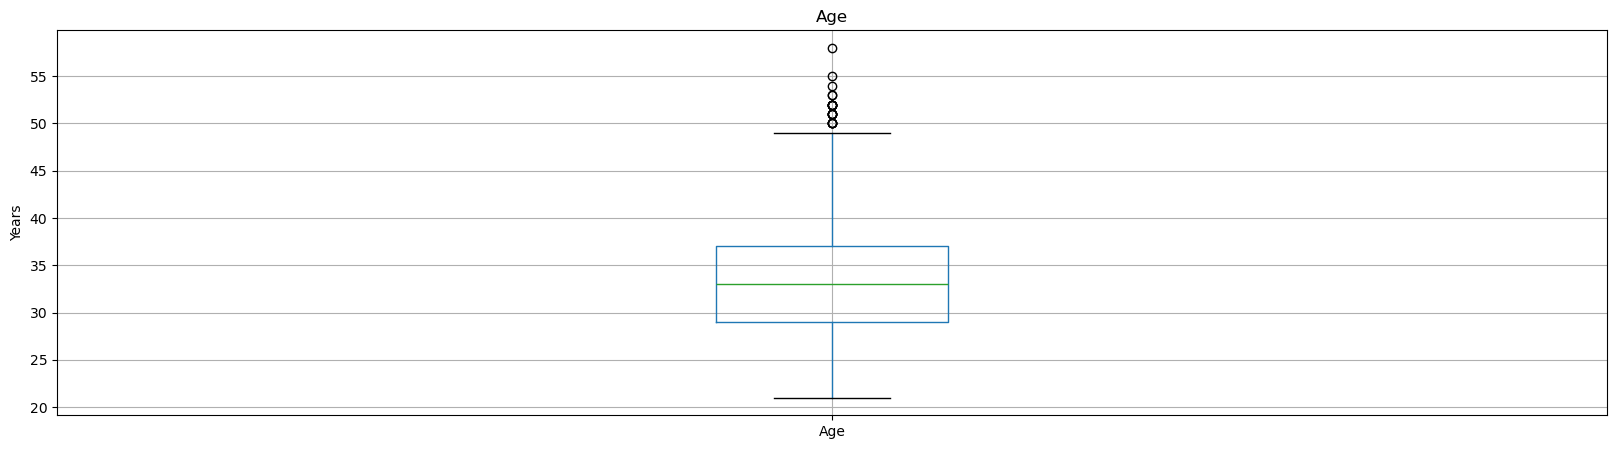

In [219]:
# Identify outliers
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
lower = Q1 - 1.5 * (Q3-Q1)                          # lower bound is 17 years old                
upper = Q3 + 1.5 * (Q3-Q1)                          # upper bound is 49 years old

below = df[df['Age'] <= lower].shape[0]
above = df[df['Age'] >= upper].shape[0]

print(f"Rows below lower bound ({int(lower)}): {below}")
print(f"Rows below upper bound ({int(upper)}): {above}")

plt.figure(figsize=(20,5))
df[["Age"]].boxplot()
plt.title("Age")
plt.ylabel("Years")
plt.show()

In [220]:
# Drop the oldest person
max_age = df.Age.max()
age_outlier = df[df["Age"] == max_age]
age_outlier
df.drop(age_outlier.index, inplace=True)

##### **Salary**


There exists 50 outlier rows with `Salary` above upper bound.
- **Resolution**:
    - Drop the 3 outliers separated from the cluster
    - Keep the outliers within the cluster
- **Reason**:
    - As there is only 3 such outliers that are much further away from the rest of the points, we opted to drop them.
    - Likely corresponds to employee with higher designation level. As such, we should keep these outliers for our data analysis
- **Assumption(s)**: -

Rows below lower bound ($-16428.125): 0
Rows below upper bound ($129902.875): 50


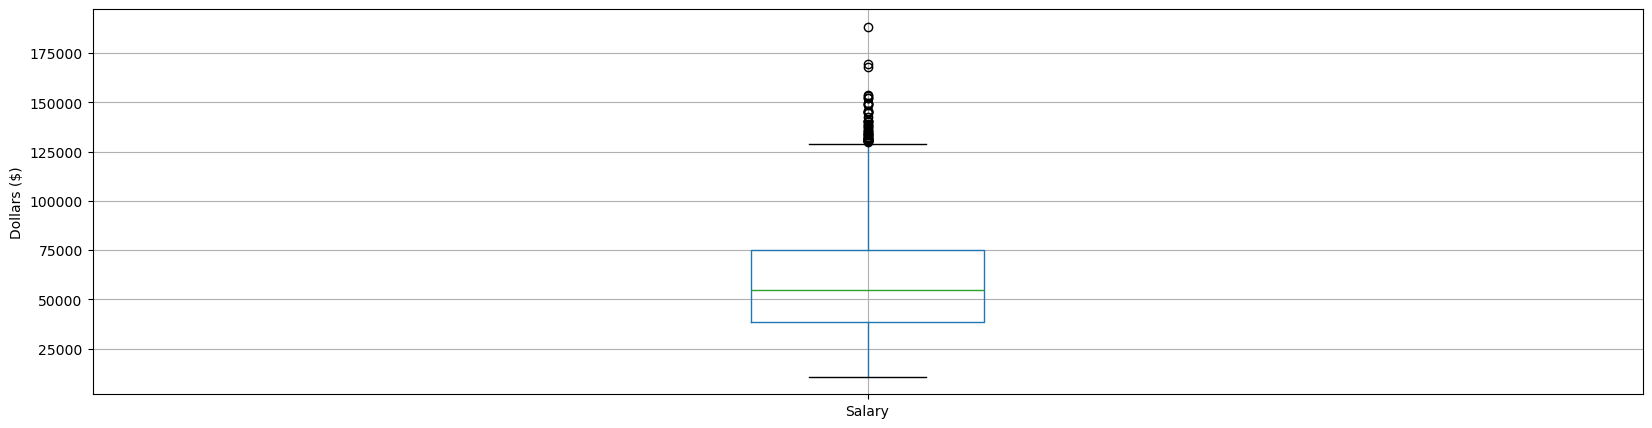

,Emp_ID,Salary
257,308,188418
2063,2420,169549
2048,2405,167758
1831,2154,153766
945,1111,153109


In [221]:
# Identify outliers for salary

Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)
lower = Q1 - 1.5 * (Q3-Q1)                          # lower bound is $-16409.25                
upper = Q3 + 1.5 * (Q3-Q1)                          # upper bound is $129844.75

below = df[df['Salary'] <= lower].shape[0]
above = df[df['Salary'] >= upper].shape[0]

print(f"Rows below lower bound (${lower}): {below}")
print(f"Rows below upper bound (${upper}): {above}")

plt.figure(figsize=(20,5))
df[["Salary"]].boxplot()
plt.ylabel("Dollars ($)")
plt.show()

df.sort_values('Salary', ascending=False)[["Emp_ID", "Salary"]].head(5)

In [222]:
# Drop the 3 outliers
top_3_outliers = df.sort_values("Salary", ascending=False).head(3)
df.drop(top_3_outliers.index, inplace=True)

##### **Last Work Date**


There exists 256 rows where the month of `Last_Work_Date` is different from that of `Date`.
- **Resolution**: Keep these outlier rows
- **Reason**: It is possible for an employee to quit days after when they last worked. As the number of rows is large (256), we opted to keep these outliers.
- **Assumption(s)**:
    - An employee may officially quit after a maximum of 3 days after they last worked"

In [223]:
df['Last_Work_Date'] = pd.to_datetime(df['Last_Work_Date'], dayfirst=True)
conditions = [['2015-12-31', '2016-01-01'], ['2016-01-31', '2016-02-01'], ['2016-02-29', '2016-03-01'], ['2016-03-31', '2016-04-01'], 
              ['2016-04-30', '2016-05-01'], ['2016-05-31', '2016-06-01'], ['2016-06-30', '2016-07-01'], ['2016-07-31', '2016-08-01'], 
              ['2016-08-31', '2016-09-01'], ['2016-09-30', '2016-10-01'], ['2016-10-31', '2016-11-01'], ['2016-11-30', '2016-12-01'], 
              ['2016-12-31', '2017-01-01'], ['2017-01-31', '2017-02-01'], ['2017-02-28', '2017-03-01'], ['2017-03-31', '2017-04-01'], 
              ['2017-04-30', '2017-05-01'], ['2017-05-31', '2017-06-01'], ['2017-06-30', '2017-07-01'], ['2017-07-31', '2017-08-01'], 
              ['2017-08-31', '2017-09-01'], ['2017-09-30', '2017-10-01'], ['2017-10-31', '2017-11-01'], ['2017-11-30', '2017-12-01']]
    
total = 0
for lwd, rd in conditions:
    conflicts = df[df["Last_Work_Date"] <= lwd]
    conflicts = conflicts[conflicts["Date"] == rd]

    count = conflicts.sort_values(by="Last_Work_Date").shape[0]
    earliest_date = conflicts.Last_Work_Date.min(0).strftime('%d %b')
    latest_date = conflicts.Last_Work_Date.max(0).strftime('%d %b')

    print(f"Date: {rd} | Last work in previous month: {count}")
    print(f" >>> From {earliest_date} to {latest_date}")
    total += count
        
print("\nAffected Rows:",total)

Date: 2016-01-01 | Last work in previous month: 5
 >>> From 31 Dec to 31 Dec
Date: 2016-02-01 | Last work in previous month: 3
 >>> From 30 Jan to 30 Jan
Date: 2016-03-01 | Last work in previous month: 12
 >>> From 27 Feb to 29 Feb
Date: 2016-04-01 | Last work in previous month: 13
 >>> From 29 Mar to 31 Mar
Date: 2016-05-01 | Last work in previous month: 14
 >>> From 29 Apr to 30 Apr
Date: 2016-06-01 | Last work in previous month: 10
 >>> From 30 May to 31 May
Date: 2016-07-01 | Last work in previous month: 14
 >>> From 28 Jun to 30 Jun
Date: 2016-08-01 | Last work in previous month: 7
 >>> From 29 Jul to 29 Jul
Date: 2016-09-01 | Last work in previous month: 11
 >>> From 29 Aug to 31 Aug
Date: 2016-10-01 | Last work in previous month: 3
 >>> From 28 Sep to 28 Sep
Date: 2016-11-01 | Last work in previous month: 11
 >>> From 29 Oct to 31 Oct
Date: 2016-12-01 | Last work in previous month: 14
 >>> From 28 Nov to 30 Nov
Date: 2017-01-01 | Last work in previous month: 4
 >>> From 30 Dec t

##### **Total Sales Acquired**


There exists 10 rows with negative `Total_Sales_Acquired`.
- **Resolution**: Drop such rows with negative `Total_Sales_Acquired`
- **Reason**: Total sales acquired should minimally be 0, not negative. We should not absolute these negative values or impute with 0 as we cannot reasonably ascertain true total sales.
- **Assumption(s)**:
    - Dataset does not keep track whether an employee caused a loss of sales

There exists 307 outlier rows with `Total_Sales_Acquired` above upper bound.
- **Resolution**: Drop the top 3 rows that have outliers.
- **Reason**: These outliers are siginficantly further away from the rest of the data points, hence, we have decided to drop them. 
- **Assumption(s)**: -

Rows with negative sales: 10
Rows below lower bound (-6039540.0): 0
Rows below upper bound (10065900.0): 307


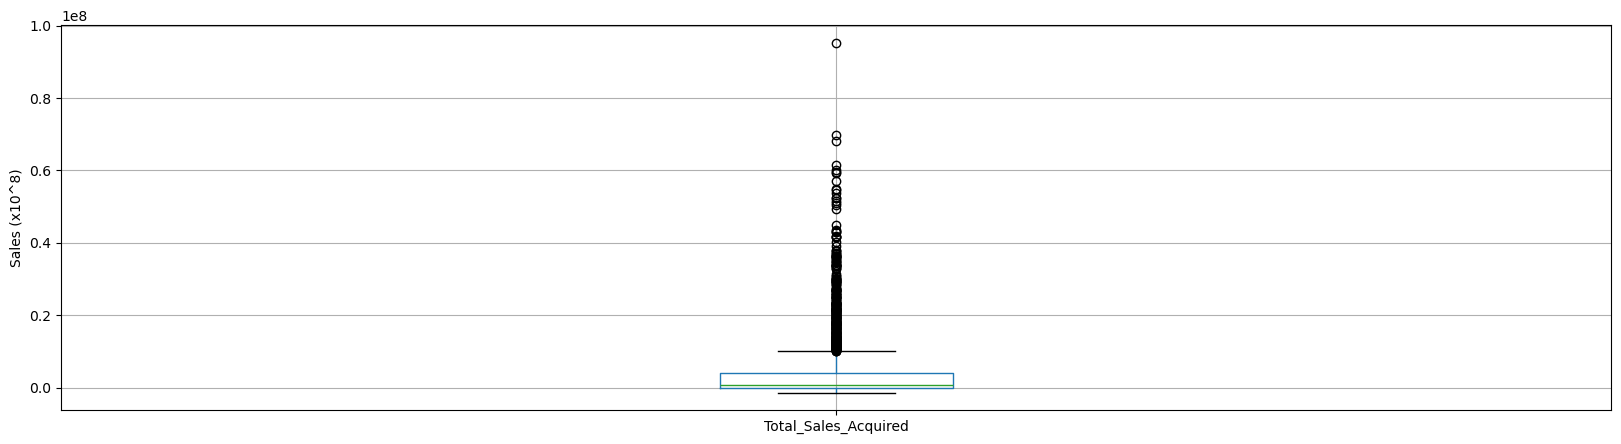

,Emp_ID,Total_Sales_Acquired
2153,2522,95331060
18,26,69867900
1883,2210,68074911
2351,2753,61583040
1395,1638,60153830


In [224]:
Q1 = df["Total_Sales_Acquired"].quantile(0.25)
Q3 = df["Total_Sales_Acquired"].quantile(0.75)
lower = Q1 - 1.5 * (Q3-Q1)                          # lower bound is                 
upper = Q3 + 1.5 * (Q3-Q1)                          # upper bound is 

negative = df[df['Total_Sales_Acquired'] < 0].shape[0]
below = df[df['Total_Sales_Acquired'] <= lower].shape[0]
above = df[df['Total_Sales_Acquired'] >= upper].shape[0]

print(f"Rows with negative sales: {negative}");
print(f"Rows below lower bound ({lower}): {below}")
print(f"Rows below upper bound ({upper}): {above}")

plt.figure(figsize=(20,5))
df[["Total_Sales_Acquired"]].boxplot()
plt.ylabel("Sales (x10^8)")
plt.show()

df.sort_values('Total_Sales_Acquired', ascending=False)[["Emp_ID", "Total_Sales_Acquired"]].head(5)

In [225]:
# Drop rows with negative sales
negativeSales = df[df['Total_Sales_Acquired'] < 0]  
df.drop(negativeSales.index, inplace=True)

In [226]:
# Drop the 3 outliers
top_3_outliers = df.sort_values("Total_Sales_Acquired", ascending=False).head(3)
df.drop(top_3_outliers.index, inplace=True)

**Size after Handling Outliers**
- **Rows**: 2144
- **Columns**: 13

In [227]:
n_rows, n_cols = df.shape
print(f"{n_rows} Rows")
print(f"{n_cols} Columns")

2144 Rows
13 Columns


[(Back)](#part2)

#### **c.** For categorical variables, perform the necessary encoding. <a id="part2c"></a>

##### **Emp ID, Join Designation, Designation, Quarterly Rating** <a id="part2c1"></a>

These categorical variables are stored as `int` and therefore need not be encoded.

##### **Gender**

Binary (nominal) variable; To apply binary encoding 
|Value|Encoded|
|:-:|:-:|
|Male|0|
|Female|1|

In [228]:
gender_encoding = {"Male":0, "Female":1} 
df["Gender_Encoded"] = df["Gender"].map(gender_encoding)        # map Gender column using encoding

df[["Date", "Emp_ID", "Gender", "Gender_Encoded"]].sample(5)

,Date,Emp_ID,Gender,Gender_Encoded
2193,2017-12-01,2571,Male,0
535,2017-12-01,619,Female,1
1051,2017-07-01,1233,Female,1
289,2017-05-01,343,Male,0
454,2017-12-01,531,Male,0


##### **City** <a id="part2c3"></a>

Ordinal variable; To apply ordinal encoding

Extract city number
|Value|Encoded|
|:-:|:-:|
|C1|1|
|C2|2|
|...|...|
|C28|28|
|C29|29|

In [229]:
city_encoding = {"C1":1, "C2":2, "C3":3, "C4":4 ,"C5":5 ,"C6":6,"C7":7,"C8":8,"C9":9,"C10":10,"C11":11, "C12":12, "C13":13, "C14":14, "C15":15 ,"C16":16 ,"C17":17,"C18":18,"C19":19,"C20":20,"C21":21,"C22":22, "C23":23, "C24":24, "C25":25, "C26":26 ,"C27":27 ,"C28":28,"C29":29}

df["City_Encoded"] = df["City"].map(city_encoding)              #map City column using encoding

df[["Date", "Emp_ID", "City", "City_Encoded"]].sample(5)


,Date,Emp_ID,City,City_Encoded
2173,2017-05-01,2549,C17,17
2298,2017-05-01,2695,C15,15
2198,2017-12-01,2576,C25,25
1825,2017-03-01,2145,C4,4
313,2017-12-01,369,C20,20


##### **Education**

Ordinal variable; To apply ordinal encoding
|Value|Encoded|
|:-:|:-:|
|College|0|
|Bachelor|1|
|Master|2|

In [230]:
education_encoding = {"College":0, "Bachelor":1, "Master":2} 
df["Education_Encoded"] = df["Education"].map(education_encoding)  # map Gender column using encoding

df[["Date", "Emp_ID", "Education", "Education_Encoded"]].sample(5)

,Date,Emp_ID,Education,Education_Encoded
2029,2016-05-01,2384,Master,2
2358,2017-12-01,2761,Master,2
476,2017-01-01,553,Bachelor,1
1443,2017-12-01,1694,Bachelor,1
2307,2017-02-01,2704,Bachelor,1


##### **Date**

Convert date string to pandas Timestamp <br>
Splice month and year from `Date`<br>
Day is not needed as data is always captured at beginning of each month (i.e. 1st)

In [231]:
# df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # already converted above

df["Recorded_Month"] = df['Date'].dt.month
df["Recorded_Year"] = df['Date'].dt.year

df[["Date", "Emp_ID", "Recorded_Month", "Recorded_Year"]].sample(5)

,Date,Emp_ID,Recorded_Month,Recorded_Year
161,2017-12-01,188,12,2017
533,2017-12-01,617,12,2017
1538,2016-08-01,1810,8,2016
2135,2017-01-01,2502,1,2017
2133,2017-12-01,2500,12,2017


##### **Join Date**

Convert date string to pandas Timestamp <br>
Splice day, month and year from `Join_Date`<br>

In [232]:
df['Join_Date'] = pd.to_datetime(df['Join_Date'], dayfirst=True)  

df["Join_Day"] = df['Join_Date'].dt.day
df["Join_Month"] = df['Join_Date'].dt.month
df["Join_Year"] = df['Join_Date'].dt.year

df[["Emp_ID", "Join_Date", "Join_Day", "Join_Month", "Join_Year"]].sample(5)

,Emp_ID,Join_Date,Join_Day,Join_Month,Join_Year
1672,1968,2015-07-13,13,7,2015
2249,2634,2016-09-15,15,9,2016
998,1178,2017-03-09,9,3,2017
847,997,2014-10-21,21,10,2014
352,417,2017-11-06,6,11,2017


##### **Last Work Date**

Convert date string to pandas Timestamp <br>
Splice day, month and year from `Last_Work_Date`<br>

In [233]:
# df['Last_Work_Date'] = pd.to_datetime(df['Last_Work_Date'], dayfirst=True)    # already converted above

df["LWD_Day"] = df['Last_Work_Date'].dt.day
df["LWD_Month"] = df['Last_Work_Date'].dt.month
df["LWD_Year"] = df['Last_Work_Date'].dt.year

df[["Emp_ID", "Last_Work_Date", "LWD_Day", "LWD_Month", "LWD_Year"]].sample(5)

,Emp_ID,Last_Work_Date,LWD_Day,LWD_Month,LWD_Year
2203,2582,2017-11-15,15,11,2017
264,317,2017-07-29,29,7,2017
321,379,2016-10-18,18,10,2016
729,855,2017-07-29,29,7,2017
1082,1273,2017-12-31,31,12,2017


[(Back)](#part2)

----
### 3.	Exploratory analysis and visualization [50% of Part I] <a id="part3"></a>
a. [Summary Statistics](#part3a) <br>
b. [Visualisaton](#part3b) <br>
c. [Bi-Variate Analysis](#part3c)

_[(Back Top)](#menu)_

#### **a.** For each variable, provide relevant summary statistics <a id="part3a"></a>

In [234]:
def displayCategorical(column):
    value_counts = df[column].value_counts()
    percentage = (value_counts / df.shape[0]) * 100

    col_data = pd.DataFrame({'Count': value_counts.values, 'Percentage': round(percentage, 2)})    
    return col_data.sort_index()

##### **Date**

In [235]:
displayCategorical("Date")

,Count,Percentage
Date,,
2016-01-01,78,3.64
2016-02-01,70,3.26
2016-03-01,65,3.03
2016-04-01,45,2.10
2016-05-01,98,4.57
2016-06-01,54,2.52
2016-07-01,50,2.33
2016-08-01,44,2.05
2016-09-01,77,3.59


##### **Emp_ID**

`Emp_ID` is an idenitifier and is unique across all 2144 rows

In [236]:
unique_count = df.Emp_ID.nunique()
n_rows, n_cols = df.shape
print(f"# unique employee IDs : {unique_count}")
print(f"# rows : {n_rows}")

# unique employee IDs : 2144
# rows : 2144


##### **Age**

In [237]:
df[["Age"]].describe()

,Age
count,2144.00000
mean,33.61334
std,5.95419
min,21.00000
25%,29.00000
50%,33.00000
75%,37.00000
max,55.00000


##### **Gender**

In [238]:
displayCategorical("Gender")

,Count,Percentage
Gender,,
Female,879,41.0
Male,1265,59.0


##### **City**

In [239]:
unique_count = df.City.nunique()
print(f"# unique cities : {unique_count}")

value_counts = df["City"].value_counts()                # Cannot sort normally by City(str) as "C10" < "C2" 
percentage = (value_counts / df.shape[0]) * 100

col_data = pd.DataFrame({'Code':df["City_Encoded"].value_counts().index,'Count': value_counts.values, 'Percentage': round(percentage, 2)})    
col_data.sort_values(by="Code").drop(columns=["Code"]) 

# unique cities : 29


,Count,Percentage
City,,
C1,75,3.50
C2,65,3.03
C3,70,3.26
C4,72,3.36
C5,68,3.17
C6,70,3.26
C7,64,2.99
C8,73,3.40
C9,72,3.36


##### **Education**

In [240]:
unique_count = df.Education.nunique()
print(f"# unique types of education : {unique_count}")

displayCategorical("Education")

# unique types of education : 3


,Count,Percentage
Education,,
Bachelor,722,33.68
College,699,32.60
Master,723,33.72


##### **Salary**

In [241]:
df[["Salary"]].describe()

,Salary
count,2144.000000
mean,58523.044310
std,27954.690734
min,10747.000000
25%,38414.250000
50%,54553.500000
75%,74855.000000
max,153766.000000


##### **Join Date**

In [242]:
unique_count = df.Join_Date.nunique()
print(f"# unique join dates : {unique_count}")
print()

classes = df.Join_Date.unique()
print(f"Values of join dates : {classes}")

all_join_dates = df.Join_Date.mode()[0]  # note that .mode() returns a series so we need to access the first element using [0]
df.Join_Date.value_counts()  # do a count to verify the mode

# unique join dates : 826

Values of join dates : <DatetimeArray>
['2015-12-24 00:00:00', '2016-12-07 00:00:00', '2016-01-09 00:00:00',
 '2017-07-31 00:00:00', '2017-09-19 00:00:00', '2017-12-07 00:00:00',
 '2016-06-29 00:00:00', '2012-05-28 00:00:00', '2017-10-16 00:00:00',
 '2015-11-30 00:00:00',
 ...
 '2017-10-20 00:00:00', '2011-10-17 00:00:00', '2013-06-21 00:00:00',
 '2010-07-08 00:00:00', '2012-08-29 00:00:00', '2014-06-12 00:00:00',
 '2017-01-26 00:00:00', '2017-02-17 00:00:00', '2016-05-16 00:00:00',
 '2017-08-28 00:00:00']
Length: 826, dtype: datetime64[ns]


Join_Date
2017-07-31    29
2017-09-28    27
2017-05-29    19
2016-10-31    18
2017-05-01    16
              ..
2017-06-24     1
2014-10-21     1
2012-12-06     1
2013-12-11     1
2017-08-28     1
Name: count, Length: 826, dtype: int64

##### **Last Work Date**

In [243]:
unique_count = df.Last_Work_Date.nunique()
print(f"# unique last work dates : {unique_count}")
print()

classes = df.Last_Work_Date.unique()
print(f"Values of last work dates : {classes}")

all_join_dates = df.Last_Work_Date.mode()[0]  # note that .mode() returns a series so we need to access the first element using [0]
df.Last_Work_Date.value_counts()  # do a count to verify the mode

# unique last work dates : 484

Values of last work dates : <DatetimeArray>
['2016-03-11 00:00:00', '2017-04-27 00:00:00', '2016-03-07 00:00:00',
 '2017-12-31 00:00:00', '2017-11-15 00:00:00', '2016-12-21 00:00:00',
 '2017-11-25 00:00:00', '2016-02-22 00:00:00', '2016-07-20 00:00:00',
 '2016-04-30 00:00:00',
 ...
 '2017-05-27 00:00:00', '2017-12-14 00:00:00', '2017-04-04 00:00:00',
 '2016-10-05 00:00:00', '2016-04-06 00:00:00', '2016-08-11 00:00:00',
 '2017-10-09 00:00:00', '2016-06-18 00:00:00', '2016-04-15 00:00:00',
 '2017-10-28 00:00:00']
Length: 484, dtype: datetime64[ns]


Last_Work_Date
2017-12-31    663
2017-07-29     65
2016-09-22     22
2017-02-17     13
2017-11-28     12
             ... 
2017-02-16      1
2017-06-01      1
2016-11-07      1
2017-11-02      1
2017-10-28      1
Name: count, Length: 484, dtype: int64

##### **Join Designation**

In [244]:
unique_count = df.Join_Designation.nunique()
print(f"# unique types of join designations : {unique_count}")

displayCategorical("Join_Designation")

# unique types of join designations : 5


,Count,Percentage
Join_Designation,,
1,948,44.22
2,712,33.21
3,443,20.66
4,34,1.59
5,7,0.33


##### **Designation**

In [245]:
unique_count = df.Designation.nunique()
print(f"# unique types of designations : {unique_count}")

displayCategorical("Designation")

# unique types of designations : 5


,Count,Percentage
Designation,,
1,696,32.46
2,758,35.35
3,551,25.70
4,122,5.69
5,17,0.79


##### **Total Sales Acquired**

In [246]:
df[["Total_Sales_Acquired"]].describe()

,Total_Sales_Acquired
count,2.144000e+03
mean,4.431632e+06
std,8.622502e+06
min,0.000000e+00
25%,0.000000e+00
50%,8.151950e+05
75%,4.027398e+06
max,6.158304e+07


##### **Quarterly Rating**

In [247]:
unique_count = df.Quarterly_Rating.nunique()
print(f"# unique types of ratings : {unique_count}")

displayCategorical("Quarterly_Rating")

# unique types of ratings : 4


,Count,Percentage
Quarterly_Rating,,
1,1576,73.51
2,326,15.21
3,150,7.00
4,92,4.29


[(Back)](#part3)

#### **b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made. <a id="part3b"></a>

##### **Date**

- **Key Observation(s)**:
    - Dec 2017 has the most data recorded as it includes those of employees that are still working (663) and have quit (72)
    - Other dates being non-zero are due to employees who had quit within that month

Still Working in Dec 2017: 663
Quit in Dec 2017: 72


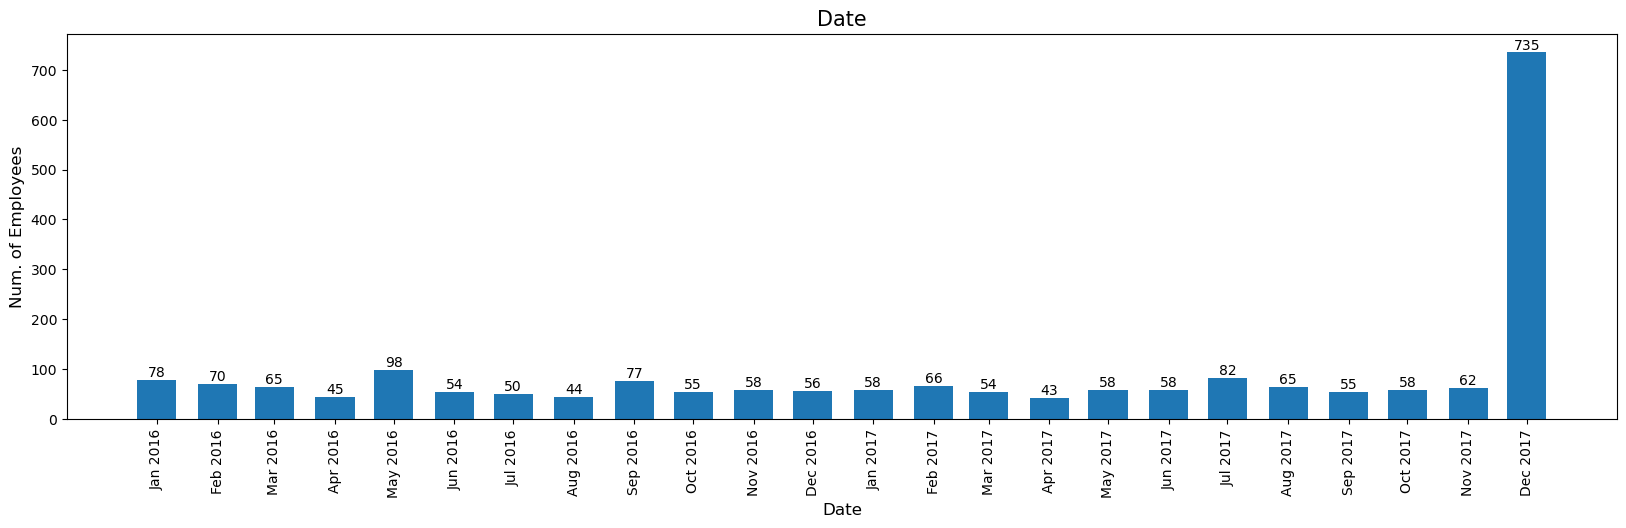

In [248]:
stillWorking = df[(df['Last_Work_Date']=="31/12/2017")].shape[0]
dec2017 = df[(df['Date']=="2017-12-01")].shape[0]
print(f"Still Working in Dec 2017: {stillWorking}")
print(f"Quit in Dec 2017: {dec2017-stillWorking}")

date_data = df["Date"].value_counts(normalize=False)
date_level = date_data.index

plt.figure(figsize=(20,5))
bars = plt.bar(date_level, date_data, width=20)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)

plt.title("Date", fontsize=15)
plt.xlabel("Date", fontsize=12)
plt.xticks(date_level, date_level.strftime('%b %Y'), rotation=90, fontsize=10)
plt.ylabel("Num. of Employees", fontsize=12)
plt.show()

##### **Emp ID**

- **Key Observation(s)**:
    - Interval between Emp_ID is not always 1, possibly suggesting a loss of data for these employees

# Total unique Emp_ID : 2144
# Total Rows : 2144


<Axes: >

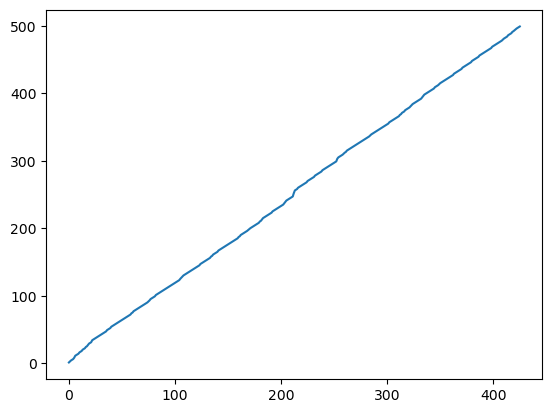

In [249]:
unique_count_emp = df.Emp_ID.nunique()
n_rows = df.shape[0]

print(f"# Total unique Emp_ID : {unique_count_emp}")
print(f"# Total Rows : {n_rows}")

df[df["Emp_ID"] < 500].Emp_ID.plot.line()

##### **Age**

- **Key Observation(s)**:
    - The distribution of Age is slightly right-skewed (more data above median)
    - Most age of employess are within range of 30 to 35

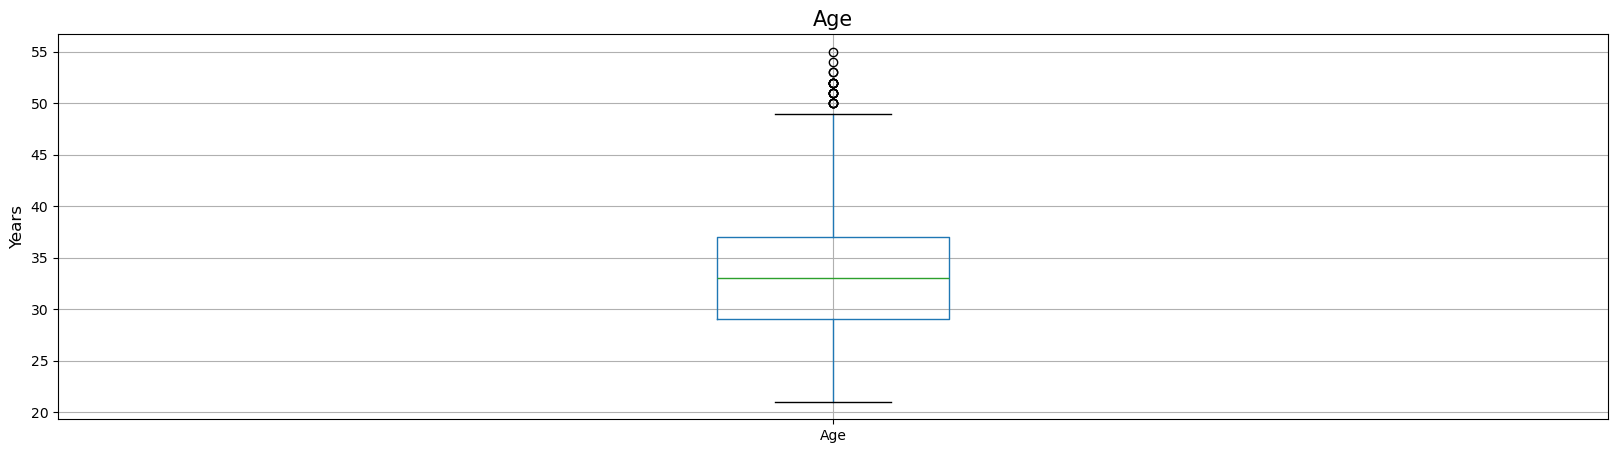

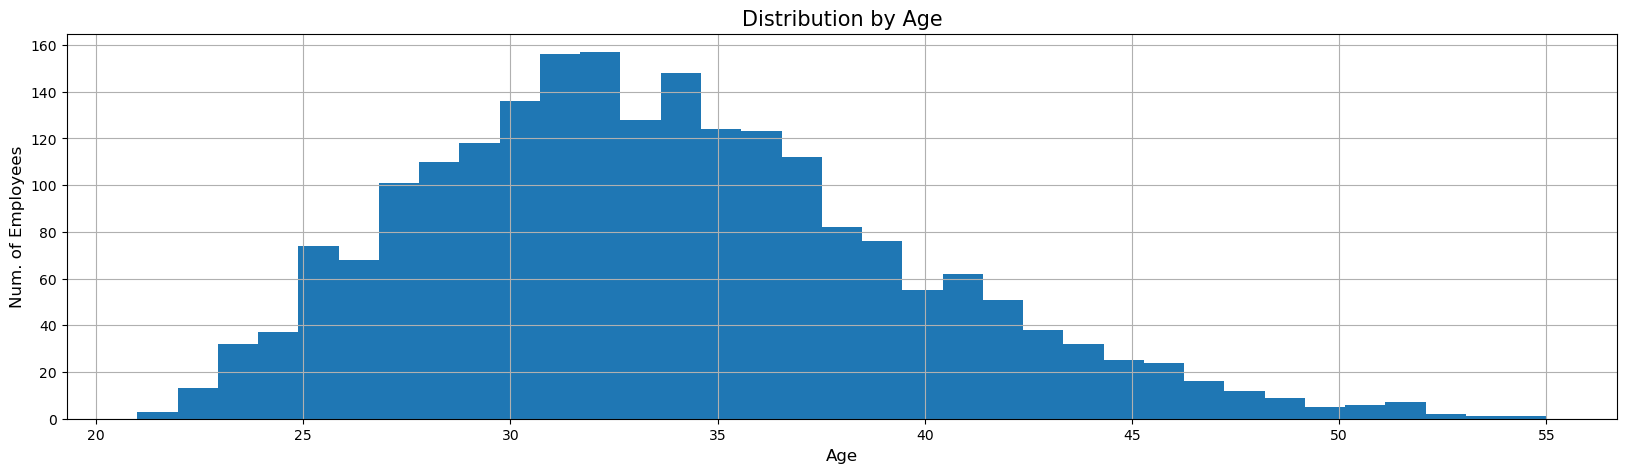

In [250]:
# Boxplot
plt.figure(figsize=(20,5))
df[["Age"]].boxplot()
plt.title("Age", fontsize=15)
plt.ylabel("Years", fontsize=12)
plt.show()

# Histogram
plt.figure(figsize=(20,5))
plt.title("Distribution by Age", fontsize=15)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Num. of Employees", fontsize=12)
df["Age"].hist(bins=35)                         # max age:55, min age: 21
plt.show()

##### **Gender**

- **Key Observation(s)**:
    - There have been more males employees (59%) than female employees (41%)

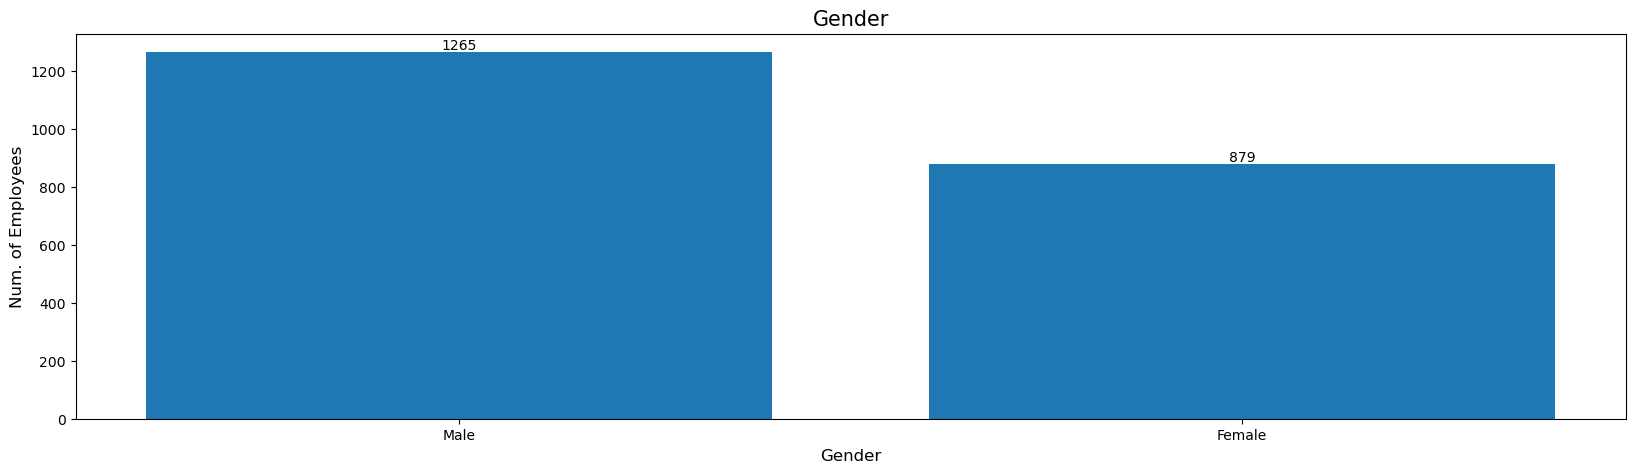

In [251]:
gender_data = df["Gender"].value_counts(normalize=False)
gender_level = gender_data.index

plt.figure(figsize=(20,5))
bars = plt.bar(gender_level, gender_data)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)

plt.title("Gender", fontsize=15)
plt.xlabel("Gender", fontsize=12)
# plt.xticks(gender_level, ['Male', 'Female'])
plt.ylabel("Num. of Employees", fontsize=12)
plt.show()

##### **City** 

- **Key Observation(s)**: 
    - City C20 has had the greatest number of employees, suggesting it is a significant location
    - The distribution across the other 28 cities appears relatively uniform

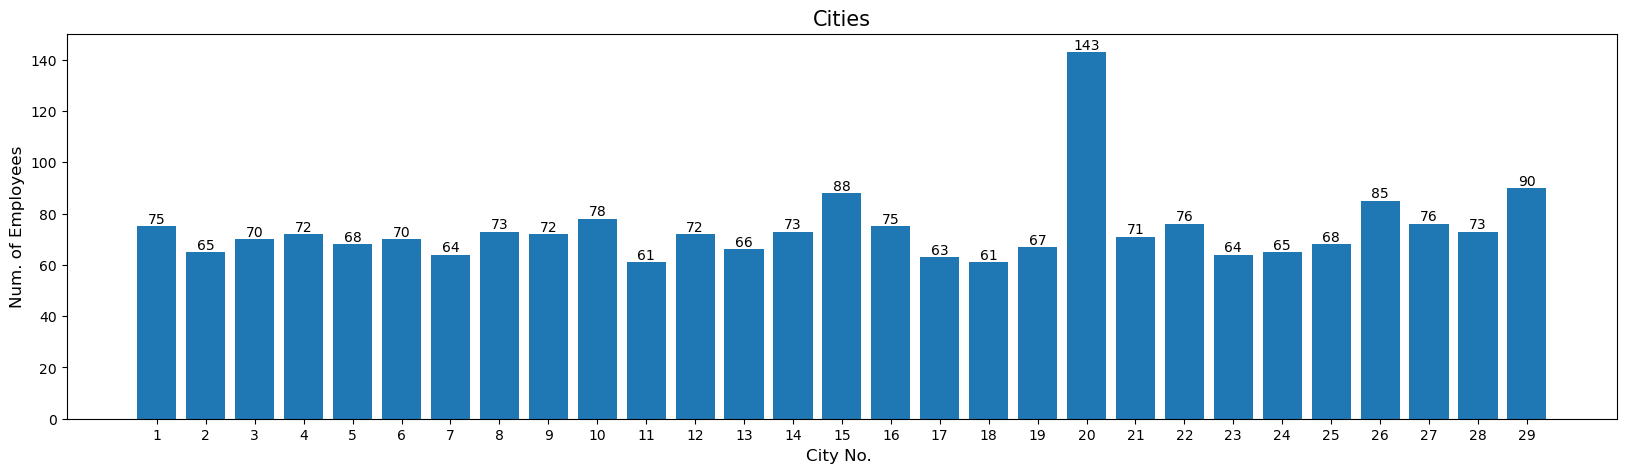

In [252]:
city_data = df["City_Encoded"].value_counts(normalize=False)
city_level = city_data.index

plt.figure(figsize=(20,5))
bars = plt.bar(city_level, city_data)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)

plt.title("Cities", fontsize=15)
plt.xlabel("City No. ", fontsize=12)
plt.xticks(range(1, 30))
plt.ylabel("Num. of Employees", fontsize=12)
plt.show()

##### **Education**

- **Key Observation(s)**:
    - The distribution across the 3 education levels is balanced, with College having a slightly lower count

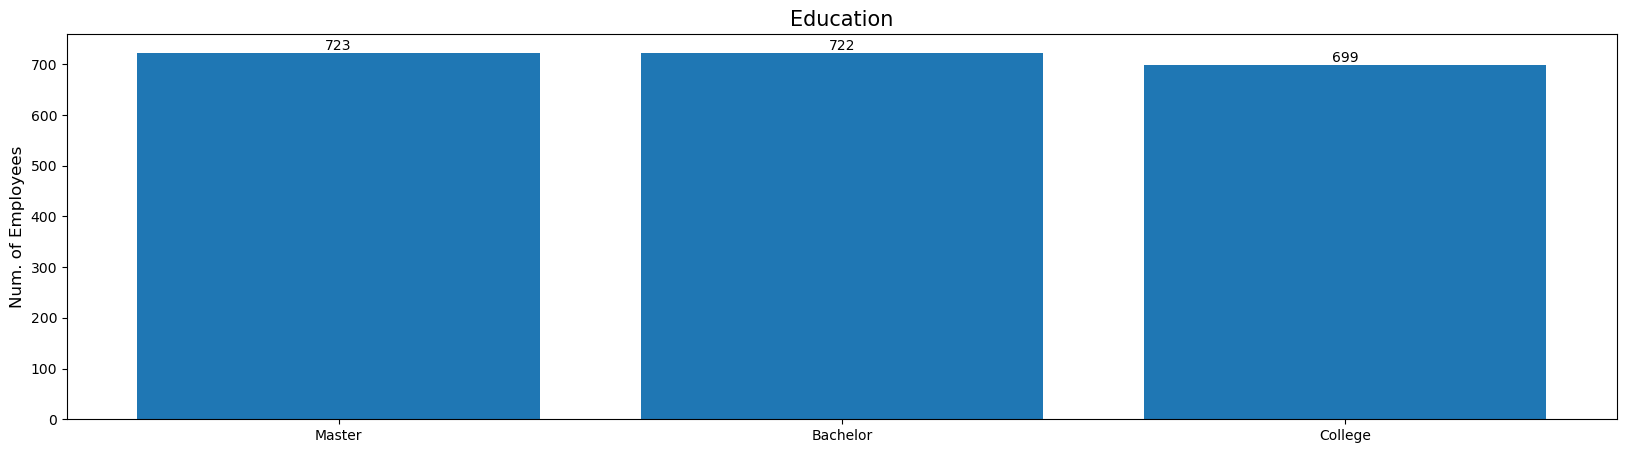

In [253]:
education_data = df["Education"].value_counts(normalize=False)
education_level = education_data.index

plt.figure(figsize=(20, 5))
bars = plt.bar(education_level, education_data)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)

plt.title("Education", fontsize=15)
plt.ylabel("Num. of Employees", fontsize=12)
plt.show()

##### **Salary**

- **Key Observation(s)**:
    - The distribution of Salary is right-skewed (more data above median)
    - There are many outliers above upper whisker, suggesting that a small portion of employees earn significantly higher salaries than the rest
    - Most salaries are within range of $40 000 to $60 000

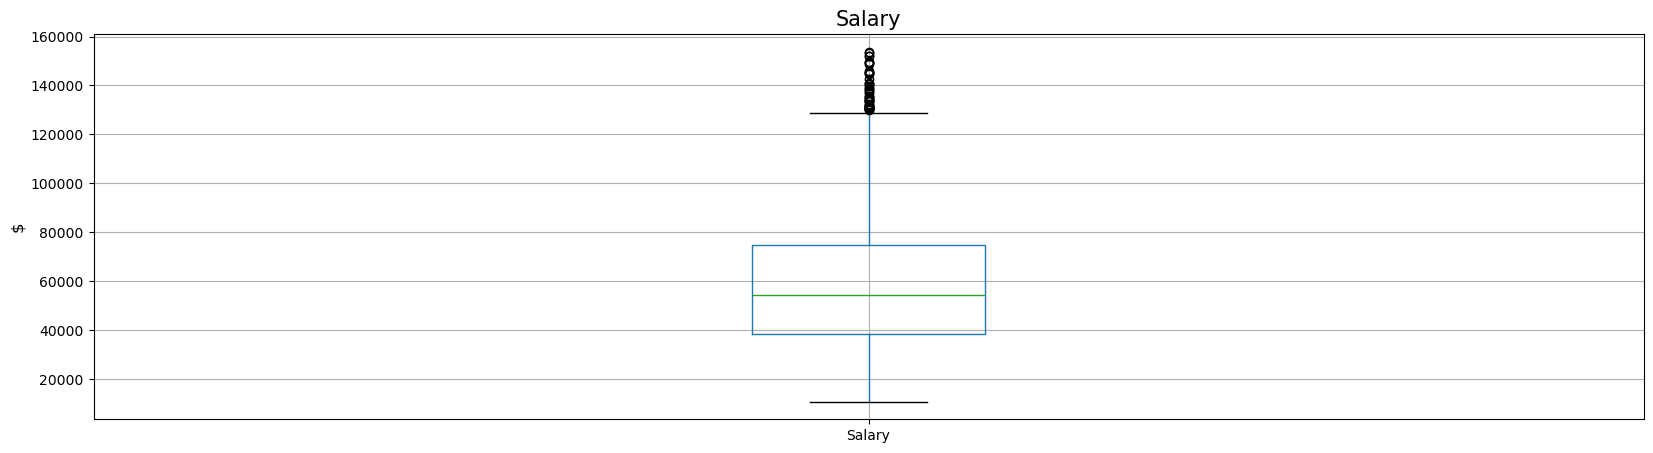

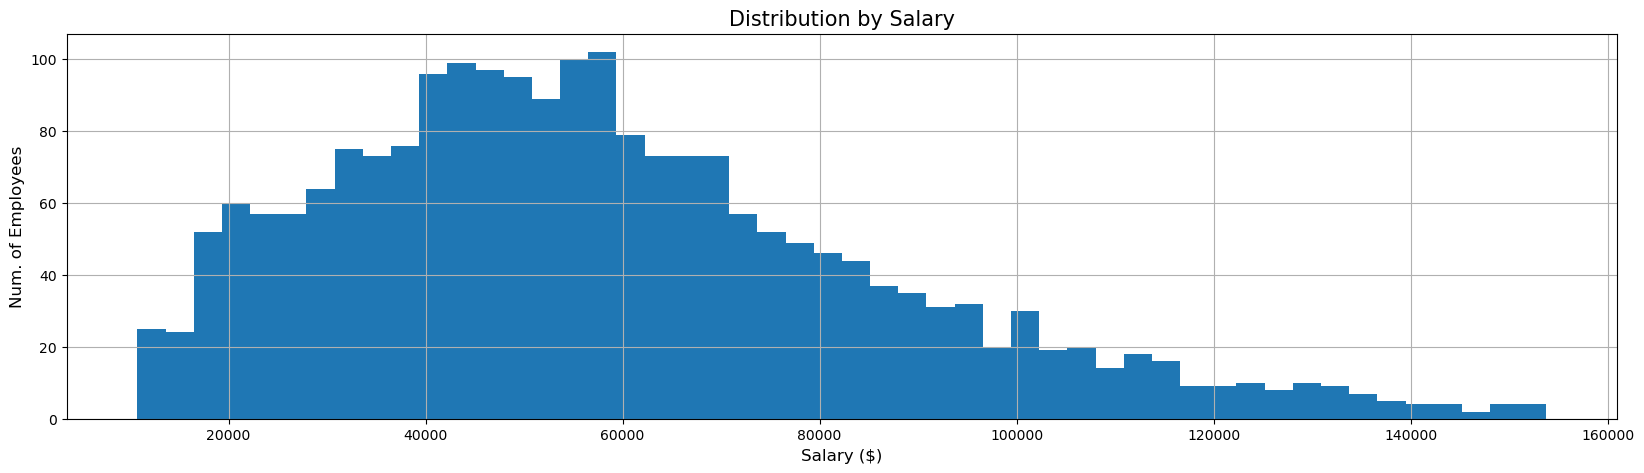

In [254]:
# Boxplot
plt.figure(figsize=(20,5))
df[["Salary"]].boxplot()
plt.title("Salary", fontsize=15)
plt.ylabel("$", fontsize=12)
plt.show()

# Histogram
plt.figure(figsize=(20,5))
plt.title("Distribution by Salary", fontsize=15)
plt.xlabel("Salary ($)", fontsize=12)
plt.ylabel("Num. of Employees", fontsize=12)
df["Salary"].hist(bins=50)                      # max salary: $153766; min salary: $10747; each bin ~$2860
plt.show()

##### **Join Date**

- **Key Observation(s)**: 
    - The highest count of hirings occurs near the end of the month (28th-109, 29th-91, 30th-103)
    - The lowest count of hirings occurs just before days with highest count (24th-42, 26th-40, 27th-46)
        <br><br>
    - The frequency of hirings is at its lowest from Apr 2010 to Apr 2012
    - There have hirings every month since May 2015, up to Dec 2017
    - The number of hirings increased significantly during May 2015 (88)
    - Since May 2015, the number of hirings are greater than those prior, except from Feb 2016 to May 2016
    - May 2017 had the most hirings in a given month (104)

# unique join dates  : 826


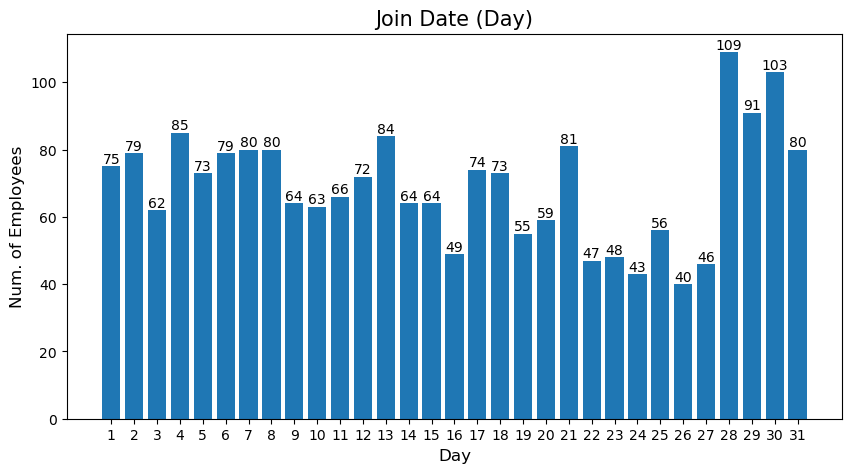

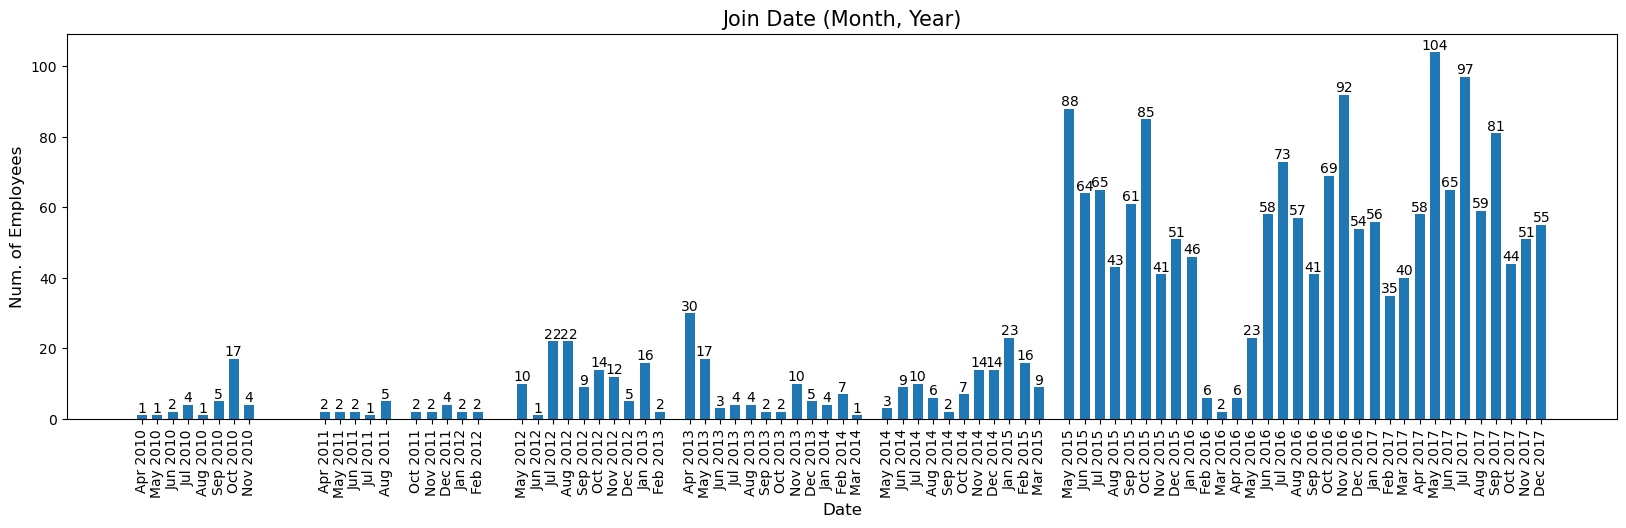

In [255]:
jd_count = df.Join_Date.nunique()
print(f"# unique join dates  : {jd_count}")

# By Day
cols = ["Join_Day", "Join_Month", "Join_Year"]
xaxes = [np.arange(1,32,1), np.arange(1,13,1), np.arange(2010,2018,1)]
labels = ["Day", "Month", "Year"]
i = 0       #for i in range(3):

date_data = df[cols[i]].value_counts(normalize=False)
date_level = date_data.index

plt.figure(figsize=(10,5))
bars = plt.bar(date_level, date_data)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)

plt.title("Join Date ("+labels[i]+")", fontsize=15)
plt.xlabel(labels[i], fontsize=12)
plt.xticks(xaxes[i]) 
plt.ylabel("Num. of Employees", fontsize=12)
plt.show()

# By Month, Year
date_data = df.groupby(df["Join_Date"].dt.to_period('M'))["Join_Date"].count()
date_level = date_data.index.to_timestamp()

plt.figure(figsize=(20,5))
bars = plt.bar(date_level, date_data, width=20)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)

plt.title("Join Date (Month, Year)", fontsize=15)
plt.xlabel("Date", fontsize=12)
plt.xticks(date_level, date_level.strftime('%b %Y'), rotation=90, fontsize=10)
plt.ylabel("Num. of Employees", fontsize=12)
plt.show()


##### **Last Work Date**

- **Key Observation(s)**: 
    - The trend of `Last_Work_Date` is similar to that of `Date`
    - The significant difference of 31 (Day graph) and Dec 2017 (Month, Year graph) is due to inclusion of people who did not quit during Dec 2017 (663)
    - The number of employees who last worked on the 31st & in Dec 2017 and quit are 17 & 56 respectively
    <br><br>
    - The highest & lowest **day** employees last worked are 29th & 26th respectively
    - In 2016, the highest & lowest **month** employees last worked are May & Jul respectively
    - In 2017, the highest & lowest **month** employees last worked are Jul & Aug respectively

# unique last work date : 484

Still Working in Dec 2017: 663


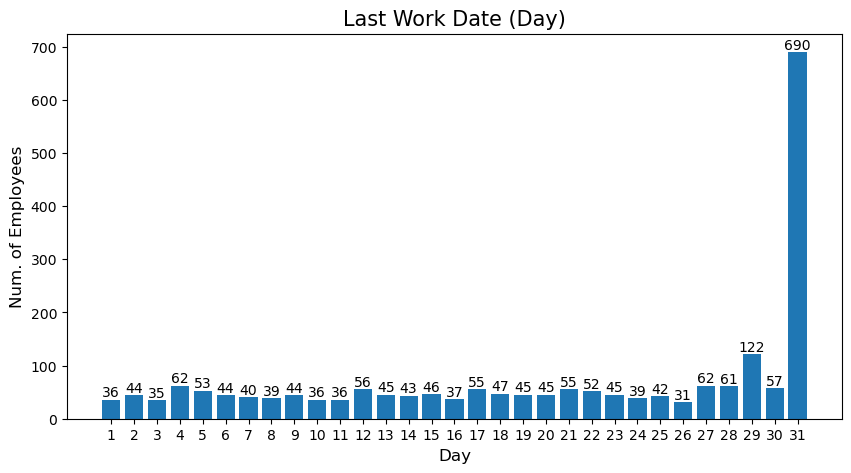

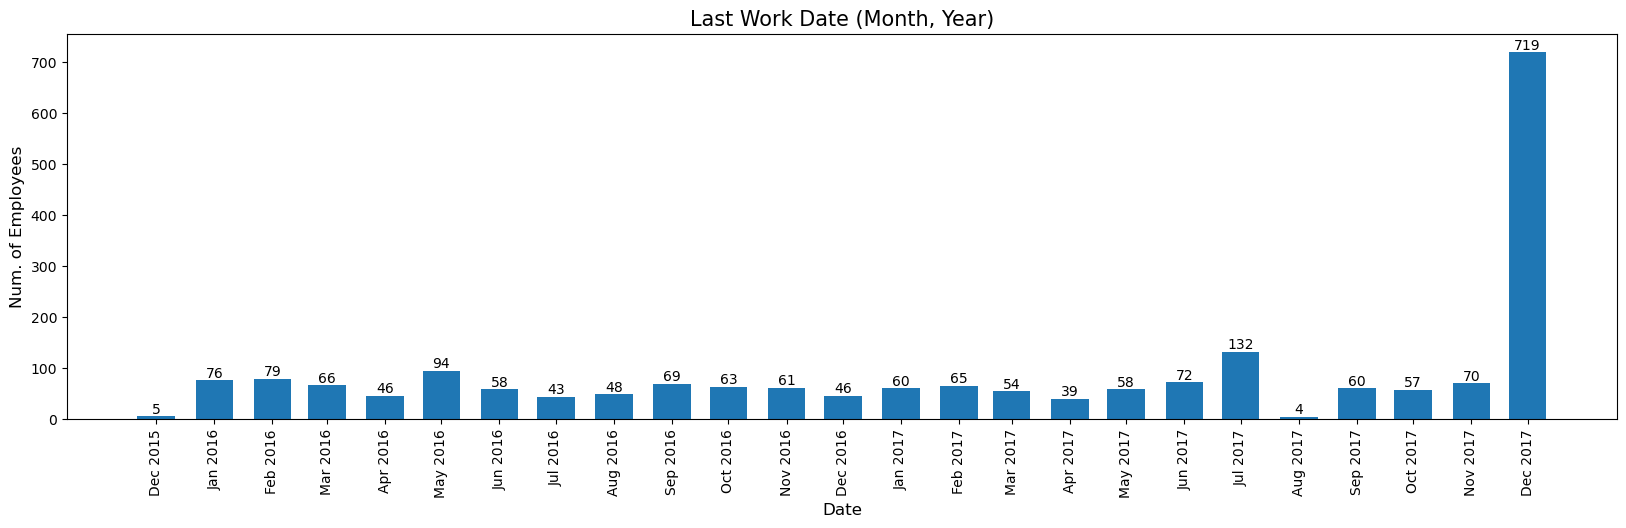

In [256]:
lwd_count = df.Last_Work_Date.nunique()
print(f"# unique last work date : {lwd_count}\n")

stillWorking = df[(df['Last_Work_Date']=="31/12/2017")].shape[0]
print(f"Still Working in Dec 2017: {stillWorking}")

# By Day
cols = ["LWD_Day", "LWD_Month", "LWD_Year"]
xaxes = [np.arange(1,32,1), np.arange(1,13,1), np.arange(2015,2018,1)]
labels = ["Day", "Month", "Year"]
i = 0           # for i in range(len(col)):

date_data = df[cols[i]].value_counts(normalize=False)
date_level = date_data.index

plt.figure(figsize=(10,5))
bars = plt.bar(date_level, date_data)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)

plt.title("Last Work Date ("+labels[i]+")", fontsize=15)
plt.xlabel(labels[i], fontsize=12)
plt.xticks(xaxes[i]) 
plt.ylabel("Num. of Employees", fontsize=12)
plt.show()

# By Month, Year
date_data = df.groupby(df["Last_Work_Date"].dt.to_period('M'))["Last_Work_Date"].count()
date_level = date_data.index.to_timestamp()

plt.figure(figsize=(20,5))
bars = plt.bar(date_level, date_data, width=20)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)

plt.title("Last Work Date (Month, Year)", fontsize=15)
plt.xlabel("Date", fontsize=12)
plt.xticks(date_level, date_level.strftime('%b %Y'), rotation=90, fontsize=10)
plt.ylabel("Num. of Employees", fontsize=12)
plt.show()

_(from above, for comparison)_
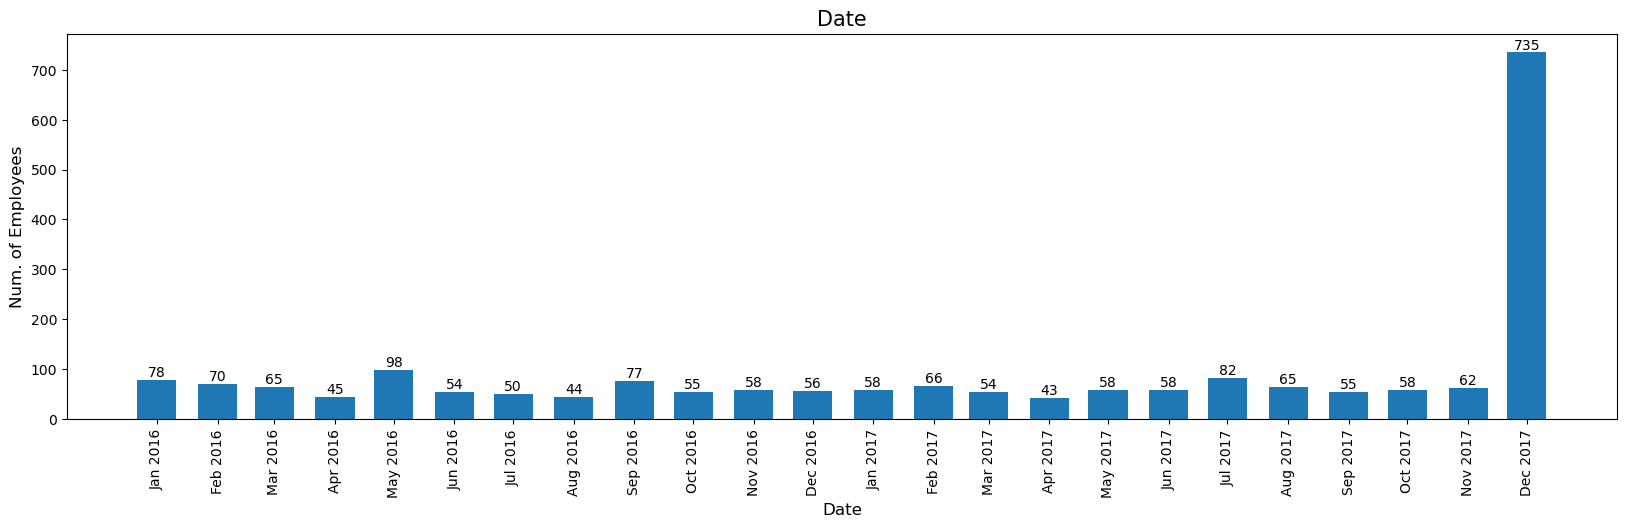

##### **Join Designation** 

- **Key Observation(s)**: 
    - Employees rarely join with designation level 4 or 5 (1.95%)
    - An employee mostly likely joins with designation level 1 (44.21%)
    - For each subsequent designation level, the employee count at that designation level decreases, with a significant drop between level 3 and 4 

##### **Designation**

- **Key Observation(s)**: 
    - There is a significant drop in the number of employees at level 1 (11.81%), suggesting a quarter of employees at level 1 were promoted
    - All other designation levels (2-5) have increased while following a similar trend as Join_Designation 
    - Designation level 3 has the greatest jump (5.02%)
    - Designation level 5 is still the smallest (0.98%), suggesting it is difficult to be promoted to level 5 

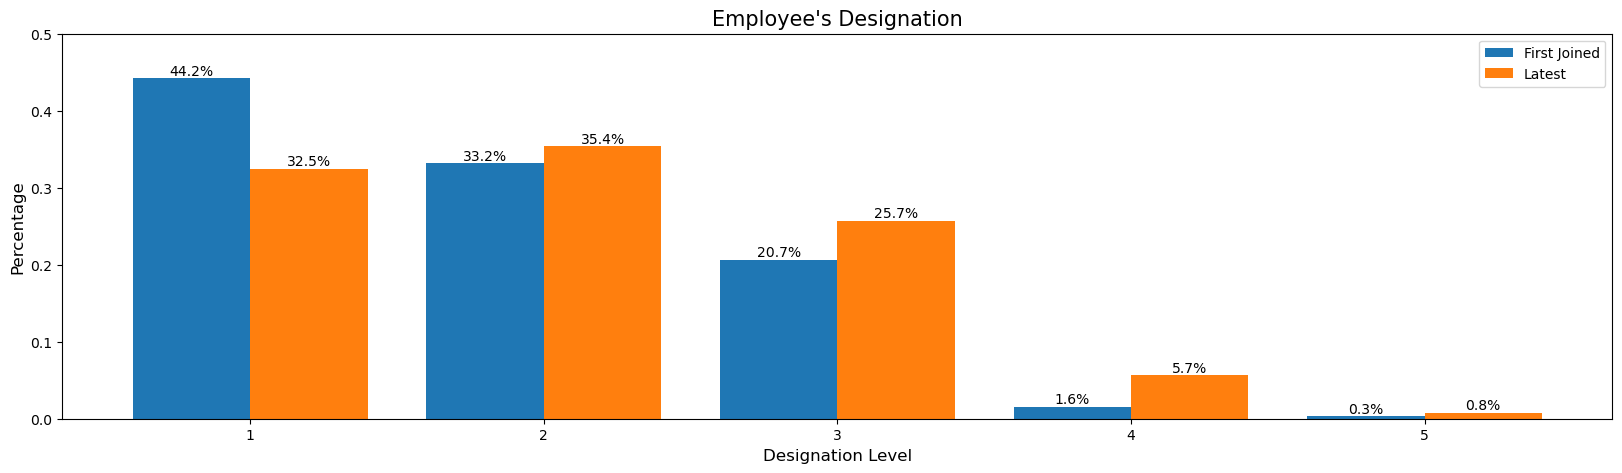

In [257]:
plt.figure(figsize=(20,5)) 

jd_data = df["Join_Designation"].value_counts(normalize=True)
bars1 = plt.bar(jd_data.index - 0.2, jd_data, 0.4, label = 'First Joined') 

for bar in bars1:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1%}', ha='center', va='bottom', fontsize=10)

cd_data = df["Designation"].value_counts(normalize=True)
bars2 = plt.bar(cd_data.index + 0.2, cd_data, 0.4, label = 'Latest') 
  
for bar in bars2:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1%}', ha='center', va='bottom', fontsize=10)

plt.xlabel("Designation Level", fontsize=12) 
plt.ylabel("Percentage", fontsize=12)  
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.legend() 
plt.title("Employee's Designation", fontsize=15)
plt.show() 

##### **Total Sales Accquired**

- **Key Observation(s)**:
    - A significant number of employees (653) acquired 0 total sales such that the lower quantile and lower bound are both 0 & is observed in the normalised distribution
    - Among the outlier data
        - The majority are concentrated between upper bound (0.1x10^8) and 0.4x10^8 total sales
        - There is another grouping between 0.5x10^8 and 0.6x10^8 total sales
    - The distribution of Total Sales Accquired is right-skewed (more data above median)

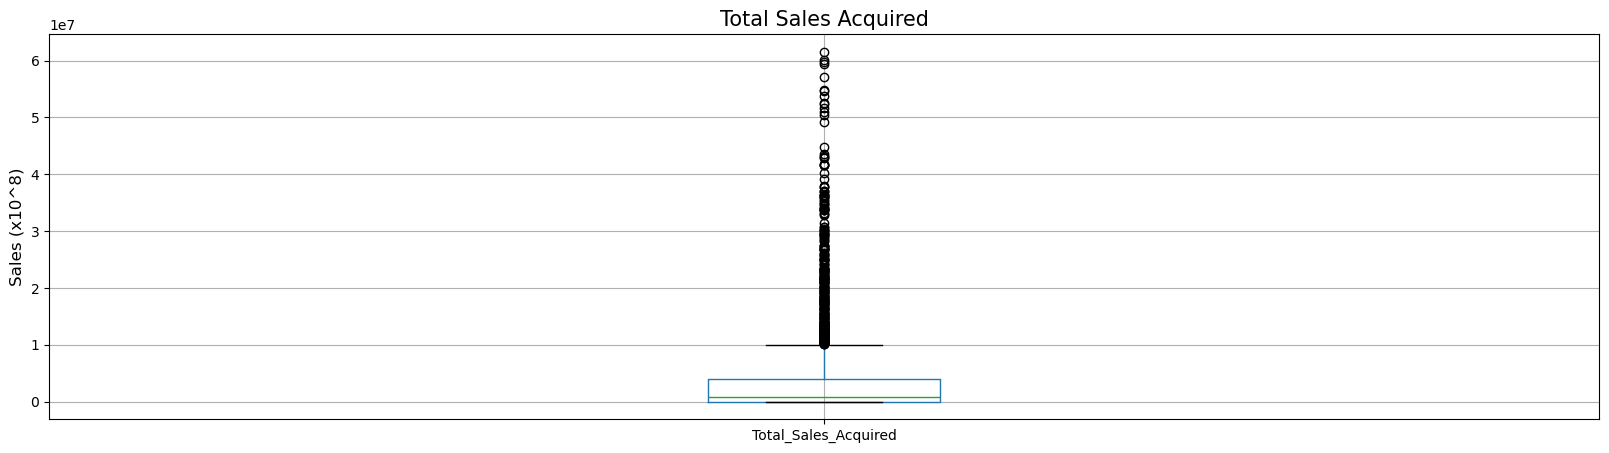

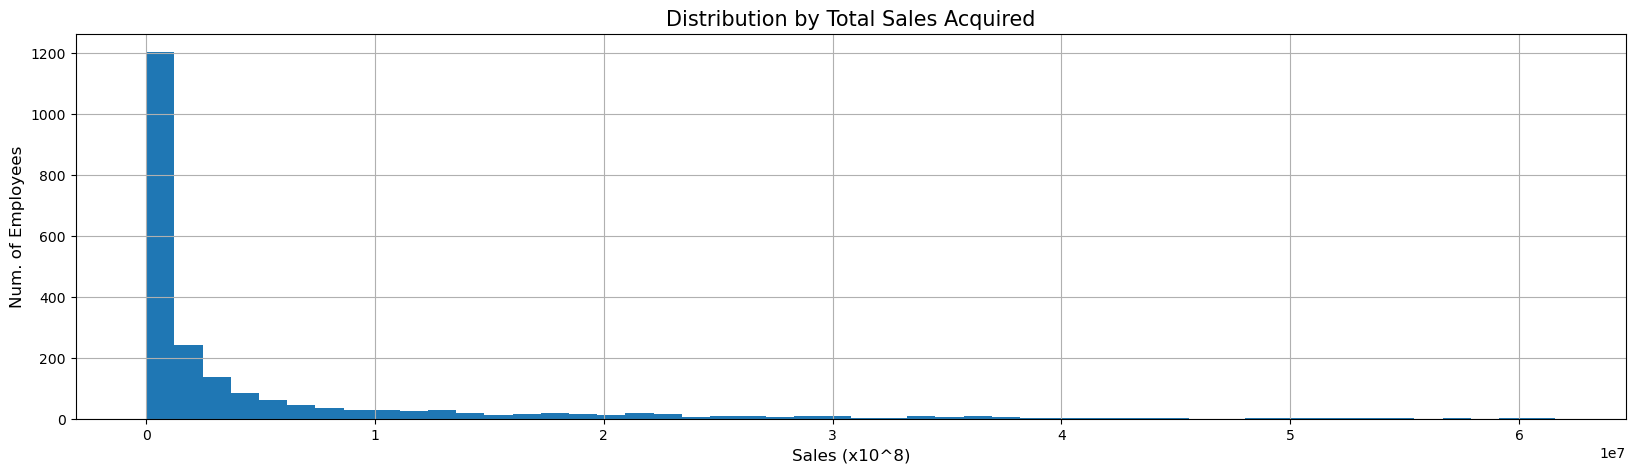

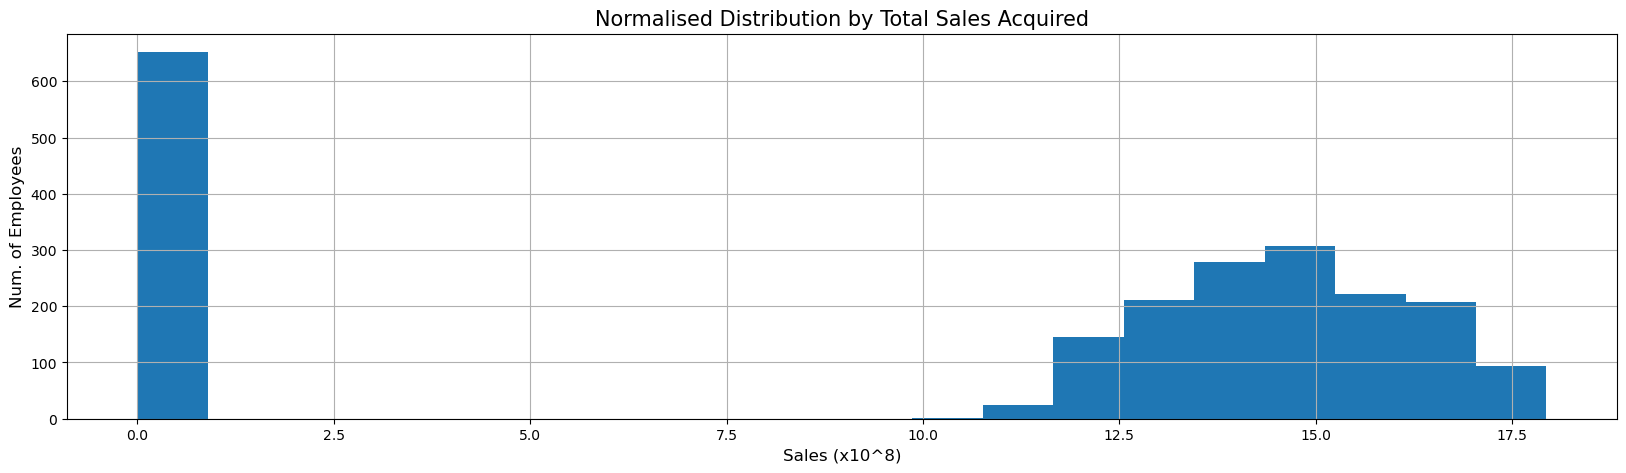

In [258]:
# Boxplot
plt.figure(figsize=(20,5))
df[["Total_Sales_Acquired"]].boxplot()
plt.title("Total Sales Acquired", fontsize=15)
plt.ylabel("Sales (x10^8)", fontsize=12)
plt.show()

# Histogram
plt.figure(figsize=(20,5))
plt.title("Distribution by Total Sales Acquired", fontsize=15)
plt.xlabel("Sales (x10^8)", fontsize=12)
plt.ylabel("Num. of Employees", fontsize=12)
df["Total_Sales_Acquired"].hist(bins=50)    
plt.show()

# Log1p Histogram
plt.figure(figsize=(20,5))
plt.title("Normalised Distribution by Total Sales Acquired", fontsize=15)
plt.xlabel("Sales (x10^8)", fontsize=12)
plt.ylabel("Num. of Employees", fontsize=12)
log_totalSalesAcquired = np.log1p(df.Total_Sales_Acquired)
log_totalSalesAcquired.hist(bins=20)
plt.show()


##### **Quarterly Rating** <a id="part3b13"></a>

- **Key Observation(s)**: 
    - Follows a logarithmic decrease, with a significant drop between rating 1 and 2
    - The majority of employees are given a quarterly rating of 1, emphasising it is difficult to attain a higher rating

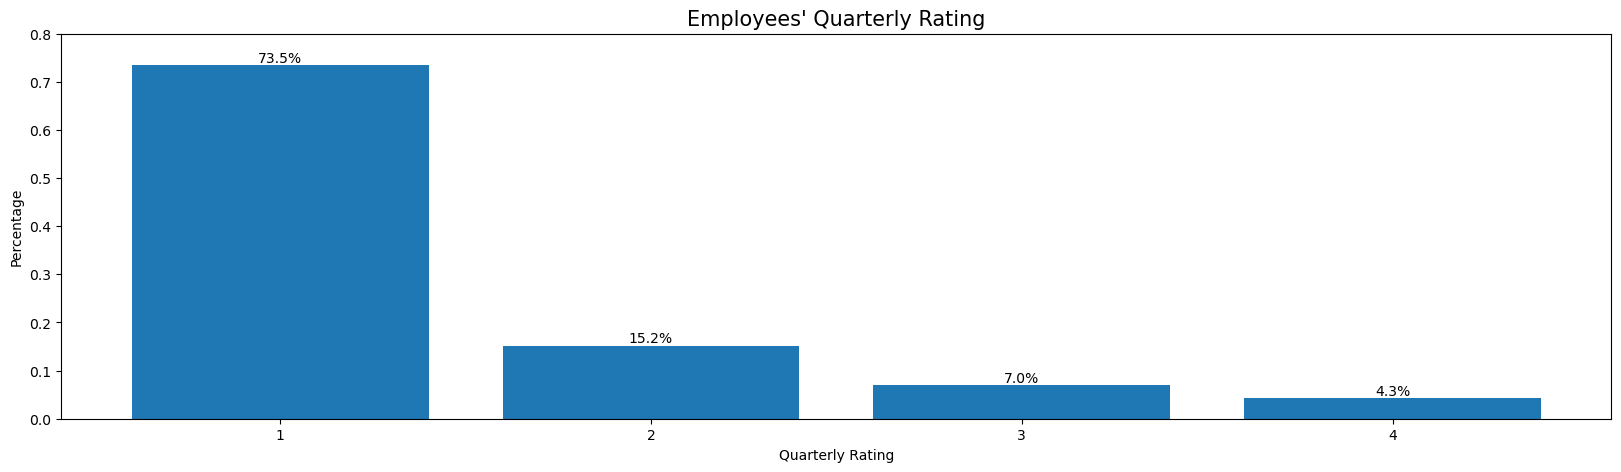

In [259]:
qr_data = df["Quarterly_Rating"].value_counts(normalize=True)
qr_level = qr_data.index

plt.figure(figsize=(20,5))
bars = plt.bar(qr_level, qr_data)

for bar in bars:                               
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():.1%}', ha='center', va='bottom', fontsize=10)
    
plt.title("Employees' Quarterly Rating", fontsize=15)
plt.xlabel("Quarterly Rating", fontsize=10)
plt.xticks([1,2,3,4])
plt.ylabel("Percentage", fontsize=10)
plt.yticks(np.arange(0,0.9,0.1))
plt.show()

[(Back)](#part3)

#### **c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations. <a id="part3c"></a>

##### **Feature Creation**

##### **Age Class**


- **Reason**: We want to investigate whether an employee's age affects/is affected by other categorical variables
    - `Basic` -> Total sales that falls before 25th quantile<br>
    - `Moderate` -> Total sales that falls within interquartile range<br>
    - `High` -> Total sales that falls with 75th quantile and top whisker<br>
    - `Elite` -> Total sales that falls after top whisker<br>

In [260]:
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
upper = Q3 + 1.5 * (Q3-Q1) 

def age_class(n):
    if n > upper:
        return "Oldest"
    elif n > Q3:
        return "Older"
    elif n < Q1:
        return "Younger"
    else:
        return "Average"
    
df["ageClass"] = df.Age.apply(age_class)
# df[["Emp_ID", "Age", "ageClass"]].head(10)

##### **Salary Class**


- **Reason**: We want to investigate whether an employee's salary affects/is affected by other categorical variables
    - `Low` -> Salaries that falls before 25th quantile<br>
    - `Average` -> Salaries that falls within interquartile range<br>
    - `High` -> Salaries that falls with 75th quantile and top whisker<br>
    - `Elite` -> Salaries that falls after top whisker<br>

In [261]:
Q1 = df["Salary"].quantile(0.25)
Q3 = df["Salary"].quantile(0.75)            
upper = Q3 + 1.5 * (Q3-Q1) 

def salary_class(n):  
    if n > upper:
        return "Elite"
    elif n > Q3:
        return "High"
    elif n < Q1:
        return "Low"
    else:
        return "Average"
    
df["salaryClass"] = df.Salary.apply(salary_class)
# df[["Emp_ID", "Salary", "salaryClass"]].head(10)

##### **Time Worked** <a id="part3ci"></a>


- **Reason**: We want to compute the number of days that an employee has worked for the sales team as it is more meaningful and useful to analyse its relationship with other variables

In [262]:
df["Time_Worked"] = df["Last_Work_Date"] - df["Join_Date"]
df["Time_Worked"] = df["Time_Worked"].dt.days   # Convert Time_Worked from timedelta to number of days
# df[["Join_Date", "Last_Work_Date", "Time_Worked"]].head(10)

##### **Time Worked Class**


- **Reason**: We also want to categorise an employee's tenure to investigate its effects on other categorical variables
    - `Newcomer` -> Days employee has worked that falls before 25th quantile<br>
    - `Experienced` -> Days employee has worked that falls within interquartile range<br>
    - `Tenured` -> Days employee has worked that falls with 75th quantile and top whisker<br>
    - `Veteran` -> Days employee has worked that falls after top whisker<br>

In [263]:
Q1 = df["Time_Worked"].quantile(0.25)
Q3 = df["Time_Worked"].quantile(0.75)    
upper = Q3 + 1.5 * (Q3-Q1) 

def tenure_class(n):  
    if n > upper:
        return "Veteran"
    elif n > Q3:
        return "Tenured"
    elif n < Q1:
        return "Newcomer"
    else:
        return "Experienced"
    
df["timeWorkedClass"] = df.Time_Worked.apply(tenure_class)
# df[["Emp_ID", "Time_Worked", "timeWorkedClass"]].head(10)


##### **Promotion**


- **Reason**: We want to check whether an employee has promoted from their initial designation and investigate whether this affects other variables

In [264]:
df["Promotion"] = df["Designation"] - df["Join_Designation"]
# df[["Emp_ID","Join_Designation", "Designation", "Promotion"]].head(10)

##### **Sales Class**


- **Reason**: We want to investigate whether the total sales acquired by an employee affects/is affected by other categorical variables
    - `Basic` -> Total sales that falls before 50th quantile<br>
    - `Moderate` -> Total sales that falls within interquartile range<br>
    - `High` -> Total sales that falls with 75th quantile and top whisker<br>
    - `Elite` -> Total sales that falls after top whisker<br>

In [265]:
Q2 = df["Total_Sales_Acquired"].quantile(0.5)
Q3 = df["Total_Sales_Acquired"].quantile(0.75)            
upper = Q3 + 1.5 * (Q3-Q1) 

def sales_class(n): 
    if n > upper:
        return "Elite"
    elif n > Q3:
        return "High"
    elif n < Q2:
        return "Basic"
    else:
        return "Moderate"
    
df["totalSalesAcquiredClass"] = df.Total_Sales_Acquired.apply(sales_class)
# df[["Emp_ID", "Total_Sales_Acquired", "totalSalesAcquiredClass"]].head(10)

##### _Helper Functions_

In [266]:
def UCP_Col(X, table, total):
    count = 0

    for index in table.index:
        count += table.at[index, X]

    return count/total

def UCP_Row(Y, table, total):
    count = 0

    for col in table.columns:
        count += table.at[Y, col]

    return count/total

def displayProb(cols, rows, table_v, table_n, col_label, row_label):
    for y in rows:
        prob_y = UCP_Col(y, table_v, df.shape[0])
        print(f"P({row_label}={y}) = {prob_y}")

        for x in cols:
            prob_y_given_x = table_n.at[x,y]
            print(f" > P({row_label}={y} | {col_label}={x}) = {prob_y_given_x}")

        print()


##### **1. Age vs Salary**

- **Explanation**: We wanted to examine if older workers earn higher salaries than younger workers, due to the fact that they have more experience in the workforce.

- **Relationship**: 
    - As the correlation coefficient is 0.200, it suggests both are **dependent** and has **a positive correlation between both variables** - the older an employee is, the greater their expected salary is

    - However, as the correlation coefficient is **not close to 1**, it implies that an employee's age is **not the sole factor** in determining their salary.

    - Employees are most likely to have a salary between $20 000 to $60 000

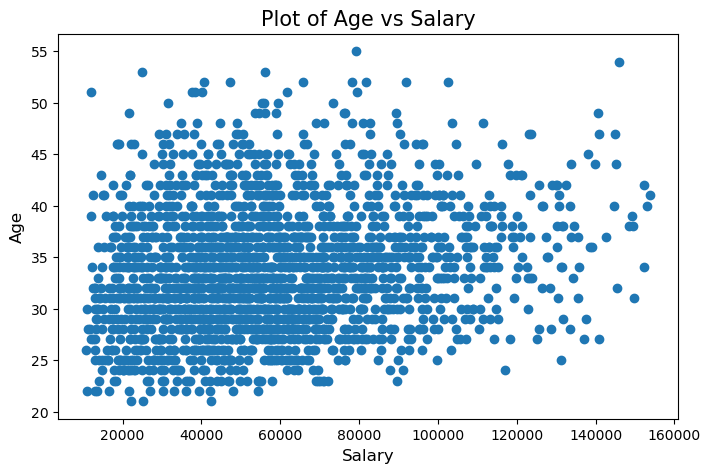

In [267]:
xs = df.Salary
ys = df.Age

plt.figure(figsize=(8,5))
plt.scatter(xs, ys)
plt.title("Plot of Age vs Salary", fontsize=15)
plt.xlabel("Salary", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.show()

In [268]:
corr_Age_Sal = np.corrcoef(xs, ys)[0][1]
cov_Age_Salary = np.cov(xs, ys)[0][1]
var_Sal = xs.var()
var_Age = ys.var() 

print(f"ρ                = {corr_Age_Sal}")       #Correlation Coefficient; p=0 -> independent
print(f"Cov(Age, Salary) = {cov_Age_Salary}")     #Cov(X,Y) = Cov(Y,X)
print(f"Var(Age)         = {var_Age}")
print(f"Var(Salary)      = {var_Sal}")

ρ                = 0.2003147622961696
Cov(Age, Salary) = 33341.90188182106
Var(Age)         = 35.45238380252273
Var(Salary)      = 781464734.0610298


##### **2. City vs Salary**

- **Explanation**: We wanted to examine if the city employee works in affects how much they earn.
- **Relationship**: 
    - We can conclude that the **salary of an employee is generally dependent of the city an employee works in** as conditional probability is quite different as unconditional probability
        - ```P(Salary = Low | City = C11)``` and ```P(Salary = Low | Gender = C4)``` is different to ```P(Salary = Low)```
            - 9.8% and 37.5% different to 25% 
        - ```P(Salary = Average | City = C18)``` and ```P(Salary = Average | City = C11)``` is same/similar to ```P(Salary = Average)```
            - 34.4% and 60.7% == 50% 
        - ```P(Salary = High | City = C16)``` and ```P(Salary = High | City = C12)``` is same/similar to ```P(Salary = High)```
            - 13.3% and 30.6% == 22.9% 
        - ```P(Salary = Elite | City = C23)``` and ```P(Salary = Elite | City = C11)``` is same/similar to ```P(Salary = Elite)```
            - 0% and 4.9% == 2.1% 

In [269]:
table_value2 = pd.crosstab(df.City, df.salaryClass)
table_norm2 = pd.crosstab(df.City, df.salaryClass, normalize="index")

display_values_2 = table_value2[["Low", "Average", "High", "Elite"]]
display_norm_2 = table_norm2[["Low", "Average", "High", "Elite"]]

display_values_2 = display_values_2.merge(df[['City', 'City_Encoded']].drop_duplicates(), on="City", how="left") # To sort by city code correctly
display_norm_2 = display_norm_2.merge(df[['City', 'City_Encoded']].drop_duplicates(), on="City", how="left") # To sort by city code correctly

display_values_2 = display_values_2.sort_values(by="City_Encoded").drop(columns="City_Encoded")
display_norm_2 = display_norm_2.sort_values(by="City_Encoded").drop(columns="City_Encoded")

display_values_2.set_index("City")
display_norm_2.set_index("City")

display(display_values_2)
display(display_norm_2)

,City,Low,Average,High,Elite
0,C1,19,39,14,3
11,C2,19,29,17,0
22,C3,15,37,18,0
23,C4,27,30,15,0
24,C5,14,36,17,1
25,C6,17,35,17,1
26,C7,17,33,12,2
27,C8,16,37,19,1
28,C9,15,40,15,2
1,C10,19,38,19,2


,City,Low,Average,High,Elite
0,C1,0.253333,0.520000,0.186667,0.040000
11,C2,0.292308,0.446154,0.261538,0.000000
22,C3,0.214286,0.528571,0.257143,0.000000
23,C4,0.375000,0.416667,0.208333,0.000000
24,C5,0.205882,0.529412,0.250000,0.014706
25,C6,0.242857,0.500000,0.242857,0.014286
26,C7,0.265625,0.515625,0.187500,0.031250
27,C8,0.219178,0.506849,0.260274,0.013699
28,C9,0.208333,0.555556,0.208333,0.027778
1,C10,0.243590,0.487179,0.243590,0.025641


In [270]:
print(f"P(Salary=Low) = {UCP_Col("Low", display_values_2, df.shape[0])}")
print(f"P(Salary=Average) = {UCP_Col("Average", display_values_2, df.shape[0])}")
print(f"P(Salary=High) = {UCP_Col("High", display_values_2, df.shape[0])}")
print(f"P(Salary=Elite) = {UCP_Col("Elite", display_values_2, df.shape[0])}\n")

salaries = ["Low", "Average", "High", "Elite"]
cities = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 
          'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 
          'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29'][::5]

displayProb(cities, salaries, table_value2, table_norm2, "City", "Salary")

P(Salary=Low) = 0.25
P(Salary=Average) = 0.5
P(Salary=High) = 0.228544776119403
P(Salary=Elite) = 0.021455223880597014

P(Salary=Low) = 0.25
 > P(Salary=Low | City=C1) = 0.25333333333333335
 > P(Salary=Low | City=C6) = 0.24285714285714285
 > P(Salary=Low | City=C11) = 0.09836065573770492
 > P(Salary=Low | City=C16) = 0.3466666666666667
 > P(Salary=Low | City=C21) = 0.2676056338028169
 > P(Salary=Low | City=C26) = 0.24705882352941178

P(Salary=Average) = 0.5
 > P(Salary=Average | City=C1) = 0.52
 > P(Salary=Average | City=C6) = 0.5
 > P(Salary=Average | City=C11) = 0.6065573770491803
 > P(Salary=Average | City=C16) = 0.49333333333333335
 > P(Salary=Average | City=C21) = 0.5070422535211268
 > P(Salary=Average | City=C26) = 0.5058823529411764

P(Salary=High) = 0.228544776119403
 > P(Salary=High | City=C1) = 0.18666666666666668
 > P(Salary=High | City=C6) = 0.24285714285714285
 > P(Salary=High | City=C11) = 0.2459016393442623
 > P(Salary=High | City=C16) = 0.13333333333333333
 > P(Salary=H

<Axes: xlabel='City'>

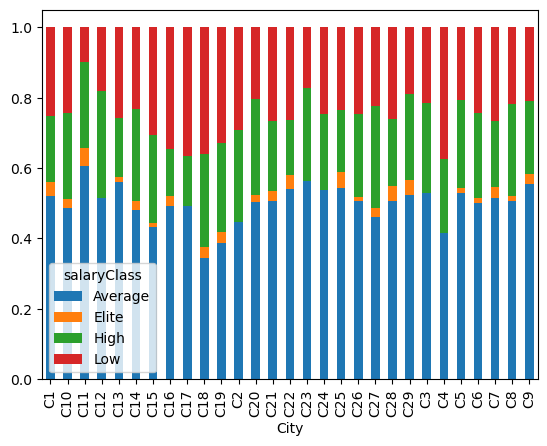

In [271]:
table_norm2.plot.bar(stacked=True)

##### **3. Designation vs Salary** 

- **Explanation**: We wanted to examine if a higher designation equates to earning higher salaries.

- **Relationship**: 
    - We can conclude that the **salary of an employee is dependent on the employee's designation** as conditional probability is quite different from unconditional probability
        - ```P(Salary = Low | Designation=1) = 54.0%``` is different from ```P(Salary = Low) = 25%``` 
        - ```P(Salary = Elite | Designation=5) = 58.8%``` is different from ```P(Salary = Elite) = 2.1%``` 
    - We can also conclude it is **not necessarily true** that **a higher designation level affects the likelihood of having a better salary**
        - ```P(Salary = High | Designation=4) > P(Salary = High | Designation=3) and P(Salary = High | Designation=5)```
            - _78.7% > 51.7% and 35.2%_
    - Our hypothesis is generally true. People who are of designation 5 have approximately 58.9% if them earning very high salaries. Conversely, those who are of designations 1 and 2 mainly earn low to middle salaries.

In [272]:
result = pd.crosstab(df.Designation, df.salaryClass, normalize="index")
result[["Low", "Average", "High", "Elite"]]

table_value3 = pd.crosstab(df.Designation, df.salaryClass)
table_norm3 = pd.crosstab(df.Designation, df.salaryClass, normalize="index")

display(table_value3[["Low", "Average", "High", "Elite"]])
display(table_norm3[["Low", "Average", "High", "Elite"]])

salaryClass,Low,Average,High,Elite
Designation,,,,
1,376,314,6,0
2,128,533,97,0
3,32,218,285,16
4,0,6,96,20
5,0,1,6,10


salaryClass,Low,Average,High,Elite
Designation,,,,
1,0.540230,0.451149,0.008621,0.000000
2,0.168865,0.703166,0.127968,0.000000
3,0.058076,0.395644,0.517241,0.029038
4,0.000000,0.049180,0.786885,0.163934
5,0.000000,0.058824,0.352941,0.588235


In [273]:
salaries = ["Low", "Average", "High", "Elite"]
designations = [1,2,3,4,5]

displayProb(designations, salaries, table_value3, table_norm3, "Designation", "Salary")

P(Salary=Low) = 0.25
 > P(Salary=Low | Designation=1) = 0.5402298850574713
 > P(Salary=Low | Designation=2) = 0.16886543535620052
 > P(Salary=Low | Designation=3) = 0.05807622504537205
 > P(Salary=Low | Designation=4) = 0.0
 > P(Salary=Low | Designation=5) = 0.0

P(Salary=Average) = 0.5
 > P(Salary=Average | Designation=1) = 0.4511494252873563
 > P(Salary=Average | Designation=2) = 0.7031662269129287
 > P(Salary=Average | Designation=3) = 0.3956442831215971
 > P(Salary=Average | Designation=4) = 0.04918032786885246
 > P(Salary=Average | Designation=5) = 0.058823529411764705

P(Salary=High) = 0.228544776119403
 > P(Salary=High | Designation=1) = 0.008620689655172414
 > P(Salary=High | Designation=2) = 0.1279683377308707
 > P(Salary=High | Designation=3) = 0.5172413793103449
 > P(Salary=High | Designation=4) = 0.7868852459016393
 > P(Salary=High | Designation=5) = 0.35294117647058826

P(Salary=Elite) = 0.021455223880597014
 > P(Salary=Elite | Designation=1) = 0.0
 > P(Salary=Elite | Desi

<Axes: xlabel='Designation'>

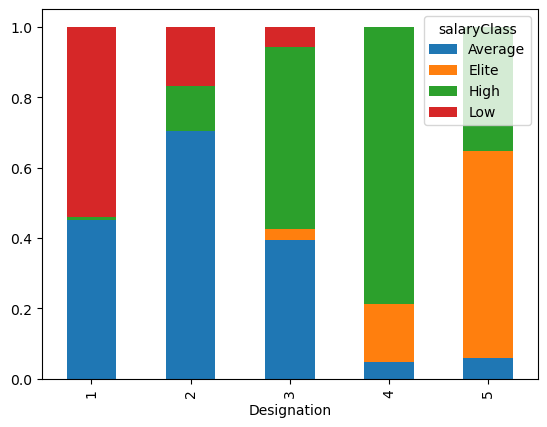

In [274]:
table_norm3.plot.bar(stacked=True)

##### **4. Education vs Join Designation**

- **Explanation**: We wanted to examine if a higher education is associared with a higher join designation when the employee first joins the company.
- **Relationship**:  
    - We can conclude that **an employee's join designation is independent of the employee's education** as conditional probability is the same/similar to unconditional probability
        - ```P(JoinDesignation=1 | Education="Master") = 44.5%``` is same/similar to ```P(JoinDesignation=1) = 44.2%``` 
        - ```P(JoinDesignation=4 | Education="Bachelor") = 1.2%``` is same/similar to ```P(JoinDesignation=4) = 1.6%``` 

    - Generally, it does not matter what each employee's education is.
    - No matter which education one attains, majority of the employees start with a join designation of 1, followed by 2. 
    - Only a small proportion of employee starts joining the company with starting positions of 4 (34) or 5 (7)

In [275]:
table_value4 = pd.crosstab(df.Education, df.Join_Designation)
table_norm4 = pd.crosstab(df.Education, df.Join_Designation, normalize="index")

display(table_value4)
display(table_norm4)

Join_Designation,1,2,3,4,5
Education,,,,,
Bachelor,325,232,153,9,3
College,301,244,137,15,2
Master,322,236,153,10,2


Join_Designation,1,2,3,4,5
Education,,,,,
Bachelor,0.450139,0.321330,0.211911,0.012465,0.004155
College,0.430615,0.349070,0.195994,0.021459,0.002861
Master,0.445367,0.326418,0.211618,0.013831,0.002766


In [276]:
educations = ["College", "Bachelor", "Master"]
join_Designations = [1,2,3,4,5]

displayProb(educations, join_Designations, table_value4, table_norm4, "Education", "JoinDesignation")

P(JoinDesignation=1) = 0.44216417910447764
 > P(JoinDesignation=1 | Education=College) = 0.43061516452074394
 > P(JoinDesignation=1 | Education=Bachelor) = 0.45013850415512463
 > P(JoinDesignation=1 | Education=Master) = 0.44536652835408025

P(JoinDesignation=2) = 0.332089552238806
 > P(JoinDesignation=2 | Education=College) = 0.3490701001430615
 > P(JoinDesignation=2 | Education=Bachelor) = 0.32132963988919666
 > P(JoinDesignation=2 | Education=Master) = 0.326417704011065

P(JoinDesignation=3) = 0.20662313432835822
 > P(JoinDesignation=3 | Education=College) = 0.19599427753934193
 > P(JoinDesignation=3 | Education=Bachelor) = 0.21191135734072022
 > P(JoinDesignation=3 | Education=Master) = 0.21161825726141079

P(JoinDesignation=4) = 0.01585820895522388
 > P(JoinDesignation=4 | Education=College) = 0.02145922746781116
 > P(JoinDesignation=4 | Education=Bachelor) = 0.012465373961218837
 > P(JoinDesignation=4 | Education=Master) = 0.013831258644536652

P(JoinDesignation=5) = 0.0032649253

<Axes: xlabel='Education'>

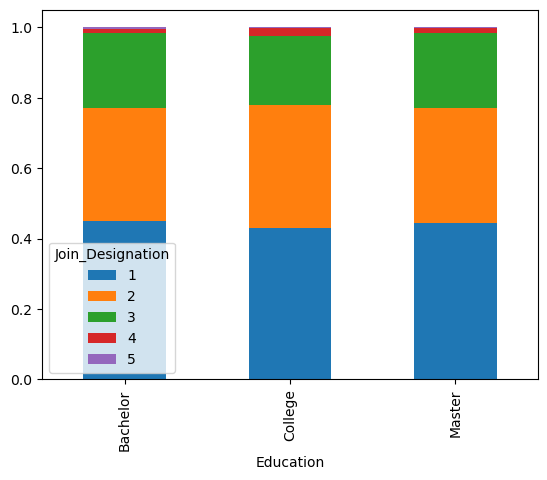

In [277]:
table_norm4.plot.bar(stacked=True)

##### **5. Age vs Designation**

- **Explanation**: We wanted to test if older workers will be assigned higher designations, since they have been there for longer periods of time.
- **Relationship**:
    - We can conclude that **an employee's latest designation is dependent on their age** as conditional probability is quite different from unconditional probability
        - ```P(Designation=1 | Age="Younger") = 51.8%``` is different from ```P(Designation=1) = 32.5%``` 
        - ```P(Designation=4 | Age="Oldest") = 1.4%``` is different from ```P(Designation=4) = 6.0%``` 

    - We can conclude that this trend is generally true.
    - From our results, if we randomly select an employee of category "older" or "oldest", we get approximately 0.133 and 0.136 probabilities that he/she is of designation 4 or 5.
    - Conversely, for if we randomly select an employee of category "younger" or "average", we get approximately 0.0160 and 0.0541 probabilities that he/she is of designation 4 or 5.
    - It is possible that older workers have higher designations.

In [278]:
table_value5 = pd.crosstab(df.ageClass, df.Designation)
table_norm5 = pd.crosstab(df.ageClass, df.Designation, normalize="index")

display(table_value5)
display(table_norm5)

Designation,1,2,3,4,5
ageClass,,,,,
Average,337,449,351,62,3
Older,127,149,142,51,13
Oldest,5,8,6,3,0
Younger,227,152,52,6,1


Designation,1,2,3,4,5
ageClass,,,,,
Average,0.280366,0.373544,0.292013,0.051581,0.002496
Older,0.263485,0.309129,0.294606,0.105809,0.026971
Oldest,0.227273,0.363636,0.272727,0.136364,0.000000
Younger,0.518265,0.347032,0.118721,0.013699,0.002283


In [279]:
designations = [1,2,3,4,5]
ages = ["Younger", "Average", "Older", "Oldest"]

displayProb(ages, designations, table_value5, table_norm5, "Age", "Designation")

P(Designation=1) = 0.3246268656716418
 > P(Designation=1 | Age=Younger) = 0.5182648401826484
 > P(Designation=1 | Age=Average) = 0.28036605657237934
 > P(Designation=1 | Age=Older) = 0.26348547717842324
 > P(Designation=1 | Age=Oldest) = 0.22727272727272727

P(Designation=2) = 0.353544776119403
 > P(Designation=2 | Age=Younger) = 0.3470319634703196
 > P(Designation=2 | Age=Average) = 0.3735440931780366
 > P(Designation=2 | Age=Older) = 0.3091286307053942
 > P(Designation=2 | Age=Oldest) = 0.36363636363636365

P(Designation=3) = 0.25699626865671643
 > P(Designation=3 | Age=Younger) = 0.1187214611872146
 > P(Designation=3 | Age=Average) = 0.29201331114808654
 > P(Designation=3 | Age=Older) = 0.2946058091286307
 > P(Designation=3 | Age=Oldest) = 0.2727272727272727

P(Designation=4) = 0.05690298507462686
 > P(Designation=4 | Age=Younger) = 0.0136986301369863
 > P(Designation=4 | Age=Average) = 0.051580698835274545
 > P(Designation=4 | Age=Older) = 0.10580912863070539
 > P(Designation=4 | A

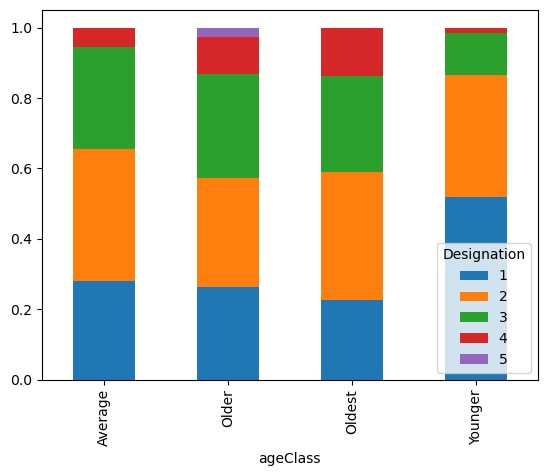

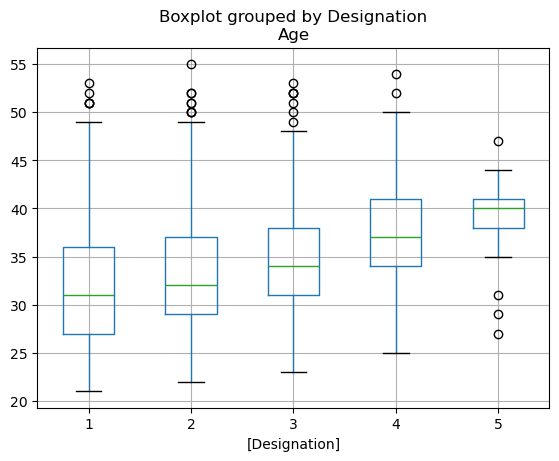

In [280]:
table_norm5.plot.bar(stacked=True)
df[['Age','Designation']].boxplot(by='Designation')
plt.show()

##### **6. City vs Promotion** 

- **Explanation**: We wanted to examine if people living in a certain cities get promoted faster than those living in other cities.
- **Relationship**:
    - We can conclude that **an employee's ability to promote is dependent on the city they work in** as conditional probability is quite different from unconditional probability
        - ```P(Promotion=0 | City=C1) = 70.6%``` is different from ```P(Promotion=0) = 83.5%``` 
        - ```P(Promotion=1 | City=C1) = 12%``` is different from ```P(Promotion=1) = 8.9%``` 

    - The probability of an employee promote by 3 or 4 designation levels is about 0.0210
    - The probabilities of an employee promote by 3 or 4 designation levels, given that they are from C1 and C4 are 0.0267 and 0.0278 respectively

In [281]:
table_value6 = pd.crosstab(df.City, df.Promotion)
table_norm6 = pd.crosstab(df.City, df.Promotion, normalize="index")

display_values_6 = table_value6.merge(df[['City', 'City_Encoded']].drop_duplicates(), on="City", how="left") # To sort by city code correctly
display_norm_6 = table_norm6.merge(df[['City', 'City_Encoded']].drop_duplicates(), on="City", how="left") # To sort by city code correctly

display_values_6 = display_values_6.sort_values(by="City_Encoded").drop(columns="City_Encoded")
display_norm_6 = display_norm_6.sort_values(by="City_Encoded").drop(columns="City_Encoded")

display_values_6.set_index("City")
display_norm_6.set_index("City")

display(display_values_6)
display(display_norm_6)

,City,0,1,2,3,4
0,C1,53,9,11,1,1
11,C2,57,6,2,0,0
22,C3,59,8,2,1,0
23,C4,59,7,4,2,0
24,C5,57,8,2,1,0
25,C6,55,5,9,0,1
26,C7,57,4,1,2,0
27,C8,63,4,4,2,0
28,C9,62,7,2,1,0
1,C10,64,8,4,2,0


,City,0,1,2,3,4
0,C1,0.706667,0.120000,0.146667,0.013333,0.013333
11,C2,0.876923,0.092308,0.030769,0.000000,0.000000
22,C3,0.842857,0.114286,0.028571,0.014286,0.000000
23,C4,0.819444,0.097222,0.055556,0.027778,0.000000
24,C5,0.838235,0.117647,0.029412,0.014706,0.000000
25,C6,0.785714,0.071429,0.128571,0.000000,0.014286
26,C7,0.890625,0.062500,0.015625,0.031250,0.000000
27,C8,0.863014,0.054795,0.054795,0.027397,0.000000
28,C9,0.861111,0.097222,0.027778,0.013889,0.000000
1,C10,0.820513,0.102564,0.051282,0.025641,0.000000


In [282]:
print(f"P(Promotion=0) = {UCP_Col(0, display_values_6, df.shape[0])}")
print(f"P(Promotion=1) = {UCP_Col(1, display_values_6, df.shape[0])}")
print(f"P(Promotion=2) = {UCP_Col(2, display_values_6, df.shape[0])}")
print(f"P(Promotion=3) = {UCP_Col(3, display_values_6, df.shape[0])}")
print(f"P(Promotion=4) = {UCP_Col(4, display_values_6, df.shape[0])}\n")

promotions = [0,1,2,3,4]
cities = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 
          'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 
          'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29'][::3]

displayProb(cities, promotions, table_value6, table_norm6, "City", "Promotion")

P(Promotion=0) = 0.8353544776119403
P(Promotion=1) = 0.08908582089552239
P(Promotion=2) = 0.05457089552238806
P(Promotion=3) = 0.018190298507462687
P(Promotion=4) = 0.002798507462686567

P(Promotion=0) = 0.8353544776119403
 > P(Promotion=0 | City=C1) = 0.7066666666666667
 > P(Promotion=0 | City=C4) = 0.8194444444444444
 > P(Promotion=0 | City=C7) = 0.890625
 > P(Promotion=0 | City=C10) = 0.8205128205128205
 > P(Promotion=0 | City=C13) = 0.803030303030303
 > P(Promotion=0 | City=C16) = 0.88
 > P(Promotion=0 | City=C19) = 0.8208955223880597
 > P(Promotion=0 | City=C22) = 0.8026315789473685
 > P(Promotion=0 | City=C25) = 0.8676470588235294
 > P(Promotion=0 | City=C28) = 0.8082191780821918

P(Promotion=1) = 0.08908582089552239
 > P(Promotion=1 | City=C1) = 0.12
 > P(Promotion=1 | City=C4) = 0.09722222222222222
 > P(Promotion=1 | City=C7) = 0.0625
 > P(Promotion=1 | City=C10) = 0.10256410256410256
 > P(Promotion=1 | City=C13) = 0.07575757575757576
 > P(Promotion=1 | City=C16) = 0.0266666666

<Axes: xlabel='City'>

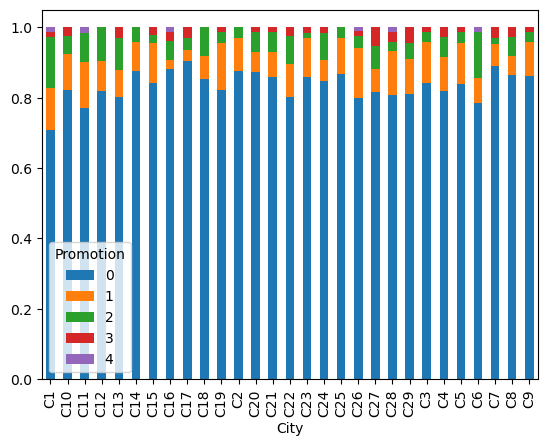

In [283]:
table_norm6.plot.bar(stacked=True)

##### **7. Time Worked vs Promotion** 

- **Explanation**: We wanted to examine if people who work longer get promoted first.
- **Relationship**: 
    - We can conclude that **an employee's ability to promote is dependent on how long they worked for** as conditional probability is quite different from unconditional probability
        - ```P(Promotion=0 | TimeWorked="Veteran") = 19.1%``` is different from ```P(Promotion=0) = 83.5%``` 
        - ```P(Promotion=1 | TimeWorked="Experienced") = 2.0%``` is different from ```P(Promotion=1) = 8.9%```

    - We can conclude if an employee promotes by 3 or 4 designation levels, it is much more likely that he/she is a tenured or veteran.
    - The probability that an employee is a tenured or a veteran is 0.25 out of all the total employees.
    - However, if one is of promotions 3 or 4, the chances that he/she is a tenured or veteran is 0.974 and 1.0 respectively.
    - Hence, the hypothesis is correct.

In [284]:
table_value7 = pd.crosstab(df.timeWorkedClass, df.Promotion)
table_norm7 = pd.crosstab(df.timeWorkedClass, df.Promotion, normalize="index")

display(table_value7)
display(table_norm7)

Promotion,0,1,2,3,4
timeWorkedClass,,,,,
Experienced,1044,22,5,1,0
Newcomer,534,0,2,0,0
Tenured,160,68,21,9,2
Veteran,53,101,89,29,4


Promotion,0,1,2,3,4
timeWorkedClass,,,,,
Experienced,0.973881,0.020522,0.004664,0.000933,0.000000
Newcomer,0.996269,0.000000,0.003731,0.000000,0.000000
Tenured,0.615385,0.261538,0.080769,0.034615,0.007692
Veteran,0.192029,0.365942,0.322464,0.105072,0.014493


In [285]:
promotions = [0,1,2,3,4]
timeWorkedClasses = ["Newcomer", "Experienced", "Tenured", "Veteran"]

displayProb(timeWorkedClasses, promotions, table_value7, table_norm7, "TimeWorked", "Promotion")

P(Promotion=0) = 0.8353544776119403
 > P(Promotion=0 | TimeWorked=Newcomer) = 0.996268656716418
 > P(Promotion=0 | TimeWorked=Experienced) = 0.9738805970149254
 > P(Promotion=0 | TimeWorked=Tenured) = 0.6153846153846154
 > P(Promotion=0 | TimeWorked=Veteran) = 0.19202898550724637

P(Promotion=1) = 0.08908582089552239
 > P(Promotion=1 | TimeWorked=Newcomer) = 0.0
 > P(Promotion=1 | TimeWorked=Experienced) = 0.020522388059701493
 > P(Promotion=1 | TimeWorked=Tenured) = 0.26153846153846155
 > P(Promotion=1 | TimeWorked=Veteran) = 0.36594202898550726

P(Promotion=2) = 0.05457089552238806
 > P(Promotion=2 | TimeWorked=Newcomer) = 0.0037313432835820895
 > P(Promotion=2 | TimeWorked=Experienced) = 0.0046641791044776115
 > P(Promotion=2 | TimeWorked=Tenured) = 0.08076923076923077
 > P(Promotion=2 | TimeWorked=Veteran) = 0.322463768115942

P(Promotion=3) = 0.018190298507462687
 > P(Promotion=3 | TimeWorked=Newcomer) = 0.0
 > P(Promotion=3 | TimeWorked=Experienced) = 0.0009328358208955224
 > P(P

<Axes: xlabel='timeWorkedClass'>

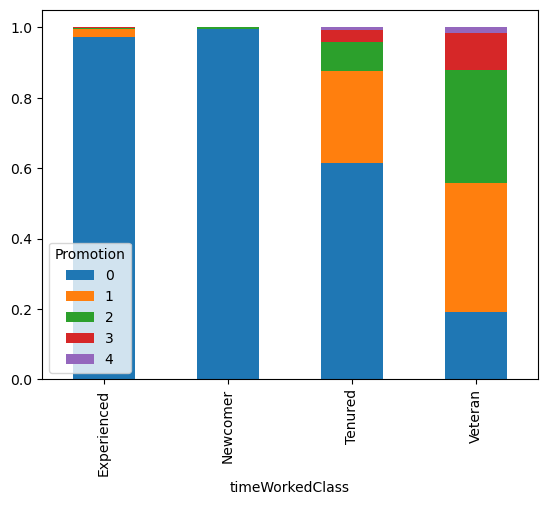

In [286]:
table_norm7.plot.bar(stacked=True)

##### **8. Gender vs Sales** <a id="part3c8"></a>

- **Explanation**: We want to examine whether an employee's gender affects the sales acquired, possibly due to customer perception and such. This would help us better understand if gender plays a role in sales generated
- **Relationship**:
    - We can conclude that the **total sales generated is independent of the employee's gender** as conditional probability is the same as unconditional probability
        - ```P(Sales = Basic | Gender = Female)``` and ```P(Sales = Basic | Gender = Male)``` is same/similar to ```P(Sales = Basic)```
            - 48.4% and 51.1% == 50% 
        - ```P(Sales = Moderate | Gender = Female)``` and ```P(Sales = Moderate | Gender = Male)``` is same/similar to ```P(Sales = Moderate)```
            - 26.3% and 24.1% == 25% 
        - ```P(Sales = High | Gender = Female)``` and ```P(Sales = High | Gender = Male)``` is same/similar to ```P(Sales = High)```
            - 10.4% and 11.1% == 10.8% 
        - ```P(Sales = Elite | Gender = Female)``` and ```P(Sales = Elite | Gender = Male)``` is same/similar to ```P(Sales = Elite)```
            - 15.0% and 13.6% == 14.2% 

In [287]:
table_value8 = pd.crosstab(df.Gender, df.totalSalesAcquiredClass)
table_norm8 = pd.crosstab(df.Gender, df.totalSalesAcquiredClass, normalize="index")

display(table_value8[["Basic", "Moderate", "High", "Elite"]])
display(table_norm8[["Basic", "Moderate", "High", "Elite"]])

totalSalesAcquiredClass,Basic,Moderate,High,Elite
Gender,,,,
Female,425,231,91,132
Male,647,305,141,172


totalSalesAcquiredClass,Basic,Moderate,High,Elite
Gender,,,,
Female,0.483504,0.262799,0.103527,0.150171
Male,0.511462,0.241107,0.111462,0.135968


In [288]:
sales = ["Basic", "Moderate", "High", "Elite"]
genders = ["Female","Male"]

displayProb(genders, sales, table_value8, table_norm8, "Gender", "Sales")

P(Sales=Basic) = 0.5
 > P(Sales=Basic | Gender=Female) = 0.48350398179749715
 > P(Sales=Basic | Gender=Male) = 0.5114624505928854

P(Sales=Moderate) = 0.25
 > P(Sales=Moderate | Gender=Female) = 0.2627986348122867
 > P(Sales=Moderate | Gender=Male) = 0.24110671936758893

P(Sales=High) = 0.10820895522388059
 > P(Sales=High | Gender=Female) = 0.10352673492605233
 > P(Sales=High | Gender=Male) = 0.11146245059288537

P(Sales=Elite) = 0.1417910447761194
 > P(Sales=Elite | Gender=Female) = 0.15017064846416384
 > P(Sales=Elite | Gender=Male) = 0.1359683794466403



<Axes: xlabel='Gender'>

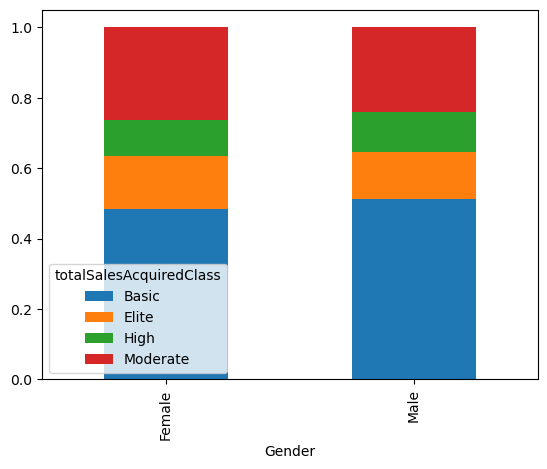

In [289]:
table_norm8.plot.bar(stacked=True)

##### **9. City vs Sales** <a id="part3c9"></a>

- **Explanation**: 
    - We want to examine whether the city an employee works at affects their total sales. 
    - City C20 would be significant as it has the most employees while other cities have a relatively balanced number of employees
    - Each city may be geographically dispositioned to have more customers and in turn affect total sales
- **Relationship**:
    - We can conclude that the **total sales generated is generally dependent of the city an employee works in** as conditional probability is quite different as unconditional probability
        - ```P(Sales = Basic | City = C22)``` and ```P(Sales = Basic | Gender = C14)``` is different to ```P(Sales = Basic)```
            - 38.2% and 56.8% different to 50% 
        - ```P(Sales = Moderate | City = C27)``` and ```P(Sales = Moderate | City = C22)``` is same/similar to ```P(Sales = Moderate)```
            - 17.1% and 34.2% == 25% 
        - ```P(Sales = High | City = C15)``` and ```P(Sales = High | City = C12)``` is same/similar to ```P(Sales = High)```
            - 3.4% and 18.4% == 10.8% 
        - ```P(Sales = Elite | City = C11)``` and ```P(Sales = Elite | City = C29)``` is same/similar to ```P(Sales = Elite)```
            - 6.2% and 25.6% == 14.2% 

In [290]:
table_value9 = pd.crosstab(df.City, df.totalSalesAcquiredClass)
table_norm9 = pd.crosstab(df.City, df.totalSalesAcquiredClass, normalize="index")

display_values_9 = table_value9[["Basic", "Moderate", "High", "Elite"]]
display_norm_9 = table_norm9[["Basic", "Moderate", "High", "Elite"]]

display_values_9 = display_values_9.merge(df[['City', 'City_Encoded']].drop_duplicates(), on="City", how="left") # To sort by city code correctly
display_norm_9 = display_norm_9.merge(df[['City', 'City_Encoded']].drop_duplicates(), on="City", how="left") # To sort by city code correctly

display_values_9 = display_values_9.sort_values(by="City_Encoded").drop(columns="City_Encoded")
display_norm_9 = display_norm_9.sort_values(by="City_Encoded").drop(columns="City_Encoded")

display_values_9.set_index("City")
display_norm_9.set_index("City")

display(display_values_9)
display(display_norm_9)

,City,Basic,Moderate,High,Elite
0,C1,32,21,11,11
11,C2,36,18,7,4
22,C3,33,20,10,7
23,C4,38,16,9,9
24,C5,37,12,9,10
25,C6,29,18,12,11
26,C7,29,18,10,7
27,C8,39,17,7,10
28,C9,40,19,7,6
1,C10,38,17,11,12


,City,Basic,Moderate,High,Elite
0,C1,0.426667,0.280000,0.146667,0.146667
11,C2,0.553846,0.276923,0.107692,0.061538
22,C3,0.471429,0.285714,0.142857,0.100000
23,C4,0.527778,0.222222,0.125000,0.125000
24,C5,0.544118,0.176471,0.132353,0.147059
25,C6,0.414286,0.257143,0.171429,0.157143
26,C7,0.453125,0.281250,0.156250,0.109375
27,C8,0.534247,0.232877,0.095890,0.136986
28,C9,0.555556,0.263889,0.097222,0.083333
1,C10,0.487179,0.217949,0.141026,0.153846


In [291]:
print(f"P(Sale=Basic) = {UCP_Col("Basic", table_value9, df.shape[0])}")
print(f"P(Sale=Moderate) = {UCP_Col("Moderate", table_value9, df.shape[0])}")
print(f"P(Sale=High) = {UCP_Col("High", table_value9, df.shape[0])}")
print(f"P(Sale=Elite) = {UCP_Col("Elite", table_value9, df.shape[0])}\n")

sales = ["Basic", "Moderate", "High", "Elite"]
cities = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 
          'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 
          'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29'][::3]

displayProb(cities, sales, table_value9, table_norm9, "City", "Sales")

P(Sale=Basic) = 0.5
P(Sale=Moderate) = 0.25
P(Sale=High) = 0.10820895522388059
P(Sale=Elite) = 0.1417910447761194

P(Sales=Basic) = 0.5
 > P(Sales=Basic | City=C1) = 0.4266666666666667
 > P(Sales=Basic | City=C4) = 0.5277777777777778
 > P(Sales=Basic | City=C7) = 0.453125
 > P(Sales=Basic | City=C10) = 0.48717948717948717
 > P(Sales=Basic | City=C13) = 0.5606060606060606
 > P(Sales=Basic | City=C16) = 0.49333333333333335
 > P(Sales=Basic | City=C19) = 0.5074626865671642
 > P(Sales=Basic | City=C22) = 0.3815789473684211
 > P(Sales=Basic | City=C25) = 0.5441176470588235
 > P(Sales=Basic | City=C28) = 0.4931506849315068

P(Sales=Moderate) = 0.25
 > P(Sales=Moderate | City=C1) = 0.28
 > P(Sales=Moderate | City=C4) = 0.2222222222222222
 > P(Sales=Moderate | City=C7) = 0.28125
 > P(Sales=Moderate | City=C10) = 0.21794871794871795
 > P(Sales=Moderate | City=C13) = 0.22727272727272727
 > P(Sales=Moderate | City=C16) = 0.22666666666666666
 > P(Sales=Moderate | City=C19) = 0.208955223880597
 > P

<Axes: xlabel='City'>

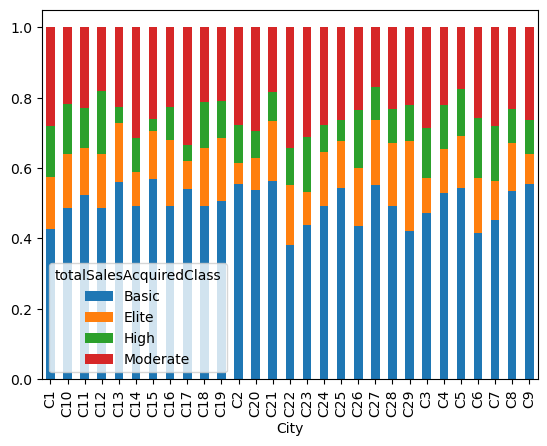

In [292]:
table_norm9.plot.bar(stacked=True)

##### **10. Time Worked vs Total Sales Acquired** <a id="part3c10"></a>

- **Explanation**: We expect that an employee who has worked for a longer time will have more opportunities to generate more sales. As such, we want to investigate the correlation between these two variables
- **Relationship**:
    - As the correlation coefficient is 0.688, it suggests both are **dependent** and has **a positive correlation between both variables** - the longer an employee has worked, the greater the total sales acquired
    - However, as the correlation coefficient is **not as close to 1**, it implies that how long an employee worked is **not the sole factor** in determining the sales acquired.


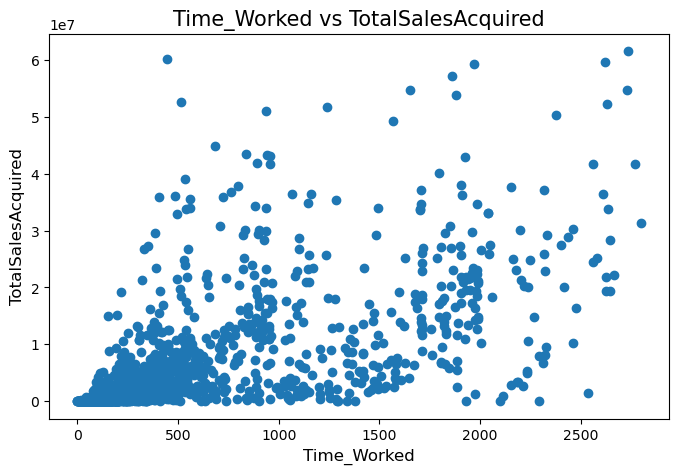

In [293]:
xs = df.Time_Worked
ys = df.Total_Sales_Acquired

plt.figure(figsize=(8,5))

plt.scatter(xs,ys)
plt.title("Time_Worked vs TotalSalesAcquired", fontsize=15)
plt.xlabel("Time_Worked", fontsize=12)
plt.ylabel("TotalSalesAcquired", fontsize=12)
plt.show()

In [294]:
corr_TW_TSA = np.corrcoef(xs, ys)[0][1]
cov_TW_TSA = np.cov(xs, ys)[0][1]
var_TW = xs.var()
var_TSA = ys.var() 

print(f"ρ                             = {corr_TW_TSA}")    #Correlation Coefficient
print(f"Cov(Time Worked, Total Sales) = {cov_TW_TSA}")     #Cov(X,Y) = Cov(Y,X)
print(f"Var(Time Worked)              = {var_TW}")
print(f"Var(Total Sales)              = {var_TSA}")

ρ                             = 0.6879869569794039
Cov(Time Worked, Total Sales) = 3293808262.8733406
Var(Time Worked)              = 308297.20300540305
Var(Total Sales)              = 74347545441600.75


##### **11. Designation vs Quarterly Rating** <a id="part3c11"></a>

- **Explanation**: 
    - We want to investigate whether the designation an employee holds have an impact on their ratings
    - A higher designation level generate biasness towards an employee's likelihood of receiving a greater rating
  
- **Relationship**:
    - We can conclude that the **rating attained is dependent on the employee's designation** as conditional probability is quite different from unconditional probability
        - ```P(Rating = 1 | Designation=4) = 52.5%``` is different from ```P(Rating = 1) = 73.5%``` 
        - ```P(Rating = 2 | Designation=4) = 36.1%``` is different from ```P(Rating = 2) = 15.2%``` 
    - We can also conclude it is **not necessarily true** that **a higher designation level affects the likelihood of attaing a rating greater than 1**
        - ```P(Rating = 3 | Designation=3) > P(Rating = 3 | Designation=2) and P(Rating = 3 | Designation=4)```
            - _8.5% > 6.8% and 8.2%_
        - ```P(Rating = 4 | Designation=3) > P(Rating = 4 | Designation=2) and P(Rating = 4 | Designation=4)```
            - _6.9% > 4.5% and 3.3%_

In [295]:
table_value11 = pd.crosstab(df.Designation, df.Quarterly_Rating)
table_norm11 = pd.crosstab(df.Designation, df.Quarterly_Rating, normalize="index")

display(table_value11)
display(table_norm11)

Quarterly_Rating,1,2,3,4
Designation,,,,
1,557,82,41,16
2,571,101,52,34
3,370,96,47,38
4,64,44,10,4
5,14,3,0,0


Quarterly_Rating,1,2,3,4
Designation,,,,
1,0.800287,0.117816,0.058908,0.022989
2,0.753298,0.133245,0.068602,0.044855
3,0.671506,0.174229,0.085299,0.068966
4,0.524590,0.360656,0.081967,0.032787
5,0.823529,0.176471,0.000000,0.000000


In [296]:
ratings = [1,2,3,4]
designations = [1,2,3,4,5]

displayProb(designations, ratings, table_value11, table_norm11, "Designation", "Rating")

P(Rating=1) = 0.7350746268656716
 > P(Rating=1 | Designation=1) = 0.8002873563218391
 > P(Rating=1 | Designation=2) = 0.7532981530343008
 > P(Rating=1 | Designation=3) = 0.6715063520871143
 > P(Rating=1 | Designation=4) = 0.5245901639344263
 > P(Rating=1 | Designation=5) = 0.8235294117647058

P(Rating=2) = 0.15205223880597016
 > P(Rating=2 | Designation=1) = 0.11781609195402298
 > P(Rating=2 | Designation=2) = 0.13324538258575197
 > P(Rating=2 | Designation=3) = 0.17422867513611615
 > P(Rating=2 | Designation=4) = 0.36065573770491804
 > P(Rating=2 | Designation=5) = 0.17647058823529413

P(Rating=3) = 0.06996268656716417
 > P(Rating=3 | Designation=1) = 0.05890804597701149
 > P(Rating=3 | Designation=2) = 0.06860158311345646
 > P(Rating=3 | Designation=3) = 0.0852994555353902
 > P(Rating=3 | Designation=4) = 0.08196721311475409
 > P(Rating=3 | Designation=5) = 0.0

P(Rating=4) = 0.04291044776119403
 > P(Rating=4 | Designation=1) = 0.022988505747126436
 > P(Rating=4 | Designation=2) = 0.

<Axes: xlabel='Designation'>

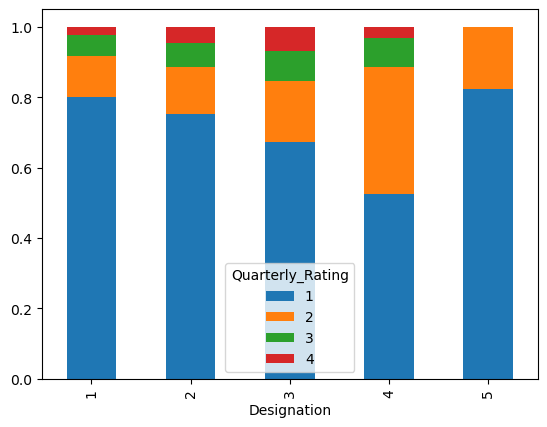

In [297]:
table_norm11.plot.bar(stacked=True)

##### **12. Sales vs Quarterly Rating** <a id="part3c12"></a>

- **Explanation**: 
    - We want to verify that the quarterly rating given to an employee is dependent on their total sales made
    - We also want to investigate whether an employee who made more sales are more likely to attain a specific rating than those who made less sales
- **Relationship**:
    - We can conclude that the **rating attained is dependent on the total sales made** as conditional probability is quite different from unconditional probability
        - ```P(Rating = 1 | Total Sales is "Basic") = 97.9%``` is different from ```P(Rating = 1) = 73.5%``` 
        - ```P(Rating = 3 | Total Sales is "Elite") = 27.3%``` is different from ```P(Rating = 3) = 7.0%``` 
    - We can also conclude the second question is **valid** for **quarterly rating of 2, 3 and 4**, but **not for a rating for 1** where employees with "Basic" total sales acquired are mostly likely to attain this rating
        - ```P(Rating = 4 | Total Sales is "Elite") > P(Rating = 4 | Total Sales is "High") > P(Rating = 4 | Total Sales is "Moderate") > P(Rating = 4 | Total Sales is "Basic")```
            - _20.72% > 9.48% > 1.30% > 0.00%_
        <br><br>
        - ```P(Rating = 1 | Total Sales is "Elite") > P(Rating = 1 | Total Sales is "High") > P(Rating = 1 | Total Sales is "Moderate") > P(Rating = 1 | Total Sales is "Basic")```
            - _21.05% < 48.28% < 65.49% < 97.85%_

In [298]:
table_value12 = pd.crosstab(df.totalSalesAcquiredClass, df.Quarterly_Rating)
table_norm12 = pd.crosstab(df.totalSalesAcquiredClass, df.Quarterly_Rating, normalize="index")

display(table_value12)
display(table_norm12)

Quarterly_Rating,1,2,3,4
totalSalesAcquiredClass,,,,
Basic,1049,23,0,0
Elite,64,94,83,63
High,112,62,36,22
Moderate,351,147,31,7


Quarterly_Rating,1,2,3,4
totalSalesAcquiredClass,,,,
Basic,0.978545,0.021455,0.000000,0.000000
Elite,0.210526,0.309211,0.273026,0.207237
High,0.482759,0.267241,0.155172,0.094828
Moderate,0.654851,0.274254,0.057836,0.013060


In [299]:
ratings = [1,3]    # [1,2,3,4]
sales = ['Basic','Moderate','High','Elite']

displayProb(sales, ratings, table_value12, table_norm12, "Sales", "Rating")

P(Rating=1) = 0.7350746268656716
 > P(Rating=1 | Sales=Basic) = 0.9785447761194029
 > P(Rating=1 | Sales=Moderate) = 0.6548507462686567
 > P(Rating=1 | Sales=High) = 0.4827586206896552
 > P(Rating=1 | Sales=Elite) = 0.21052631578947367

P(Rating=3) = 0.06996268656716417
 > P(Rating=3 | Sales=Basic) = 0.0
 > P(Rating=3 | Sales=Moderate) = 0.05783582089552239
 > P(Rating=3 | Sales=High) = 0.15517241379310345
 > P(Rating=3 | Sales=Elite) = 0.2730263157894737



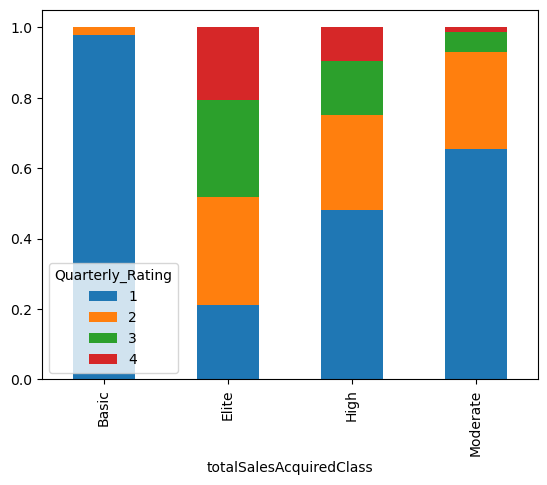

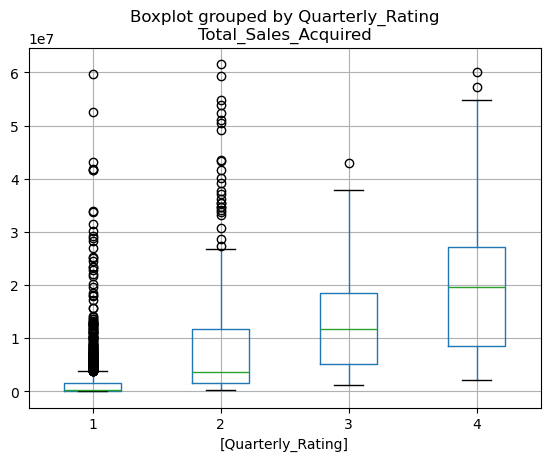

In [300]:
table_norm12.plot.bar(stacked=True)
df[['Total_Sales_Acquired','Quarterly_Rating']].boxplot(by='Quarterly_Rating')
plt.show()

<br></br>
## Part II: Modeling [12% of final grade] <a id="phase2"></a>

### 1. Problem Formulation [15% of Part II] <a id="part4"></a>
a. [Problem Statements](#part4a) <br>
b. [Problem Selected](#part4b) <br>
c. [Dependent Variable](#part4c)

_[(Back Top)](#menu)_

#### **a.** Formulate one regression problem and one classification based on the dataset, in **no more than 50 words**. <a id="part4a"></a>

<div style="text-align: justify;">
As an employee's performance directly impacts company revenue, it is crucial for the sales team to predict key performance indicators. 

We chose a **regression** problem on `Total_Sales_Acquired` and a **classification** problem on `Quarterly_Rating`, using employees’ personal details (`Age`, `City`, etc) and employment records (`Salary`, `Designation`, etc) to predict these indicators.
</div>

#### **b.** State which problem (regression or classification) you would be investigating and why, in **no more than 20 words**. <a id="part4b"></a>

We are investigating the classification problem as it provides a baseline to ensure employees’ performance is assessed fairly and equitably.

#### **c.** Clearly specify the dependent variable you are predicting, and its significance, in **no more than 20 words** <a id="part4c"></a>

<div style="text-align: justify;">

We are predicting `Quarterly_Rating` as it is the key performance indicator and helps optimise resource management and improve company revenue.
</div>

---
### 2. Model Training [30% of Part II] <a id="part5"></a>
a. [Feature Selection](#part5a) <br>
b. [Train & Test Sets](#part5b) <br>
c. [Models](#part5c) <br>
d. [Training](#part5d)

_[(Back Top)](#menu)_

#### **a.** Perform feature selection. For each variable, decide if you want to include it as a feature and provide a justification. You may leverage on your analysis in Part I: EDA and/or perform additional analysis. <a id="part5a"></a>

##### **Date** & **Emp ID**

Both variables are indexes and would not have explanatory power in determining `Quarterly_Rating`

##### **Designation**

We concluded in [Part 1 (3C)](#part3c11) that `Quarterly_Rating` is **dependent** of an employee's latest designation, therefore, we will include `Designation` as a **feature**

##### **Total Sales Acquired**

We concluded in [Part 1 (3C)](#part3c12) that `Quarterly_Rating` is **dependent** on the total sales made by an employee, therefore, we will include `Total_Sales_Acquired` as a **feature**

##### **Gender**, **City**, **Education** & **Join Designation**

These categorical variables have yet to be investigated for a potential relationship with `Quarterly_Rating`

We first want to exclude any variable with a dominant value because it is likely to have little explanatory power in determining `Quarterly_Rating`. The criteria to exclude a feature is if its mode has a frequency of more than 50%. 

**Conclusion:**
- Among the four categorical variables, we will **exclude** `Gender` (59.0%) and **keep** `City` (6.7%), `Education` (33.7%) & `Join_Designation` (44.2%). 

Variables to Keep: ['City', 'Education', 'Join_Designation']


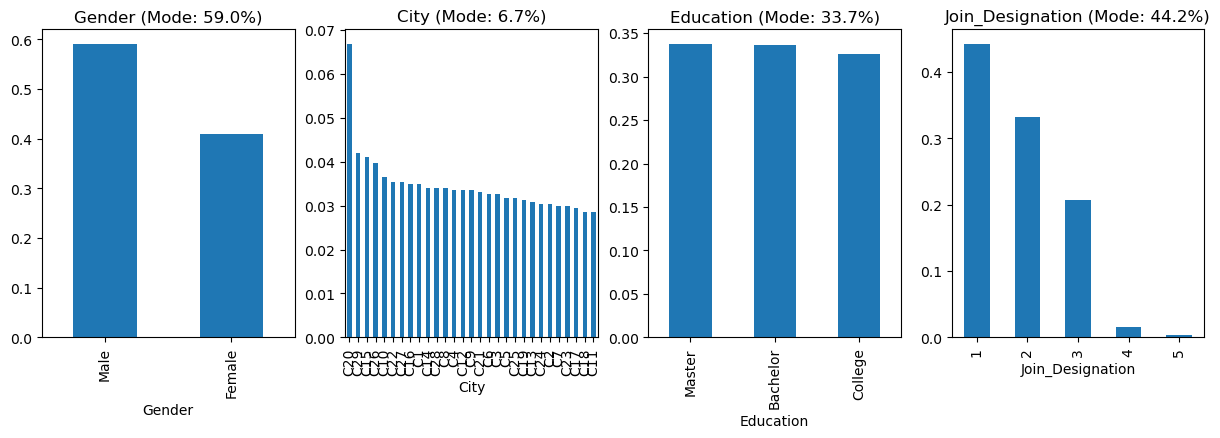

In [301]:
categorical_candidates = ["Gender", "City", "Education", "Join_Designation"]
categorical_selected = []

row, col = 1, len(categorical_candidates)
fig, ax = plt.subplots(row, col, figsize=(15,4))

threshold = 0.5

for i in range(col):
    feature = categorical_candidates[i]
    norm_table = df[feature].value_counts(normalize=True)

    mode = norm_table.iloc[0]                                   # Find mode of variable
    if mode < threshold:                                        # Keep if mode fulfill criteria
        categorical_selected.append(feature)

    ax = plt.subplot(row,col,i+1)                               # Plot bar graph
    ax.set_title(f"{feature} (Mode: {round(mode*100,1)}%)")
    norm_table.plot(kind='bar')

print(f"Variables to Keep: {categorical_selected}")
plt.show()

We next want to look into how the 3 categorical variables are related to `Quarterly_Rating`. We will plot a stacked bar plot and observe the distribution of `Quarterly_Rating` across the 3 categorical variables.

**Observations:**:
- For `City`
    - It appears that there is no relationship because the distribution of `Quarterly_Rating` appears relatively consistent - rating 1 is the largest while other ratings are smaller with only slight variation across all cities.
- For `Education`
    - It appears that there is no relationship because `Quarterly_Rating` is very similar across the 3 education categories.
- For `Join_Designation`
    - Employees with `Join_Designation` = `5` has a much higher percentage of rating 1 for `Quarterly_Rating` compared to employees with other designation levels.

**Conclusion:**
- We will only **keep** `Join_Designation` as a **feature**. 
- As discussed [previously](#part2c1), there is no need to encode `Join_Designation` as it is ordinal and stored as `int`. 

Selected Categorical Variables: ['Join_Designation', 'Designation']


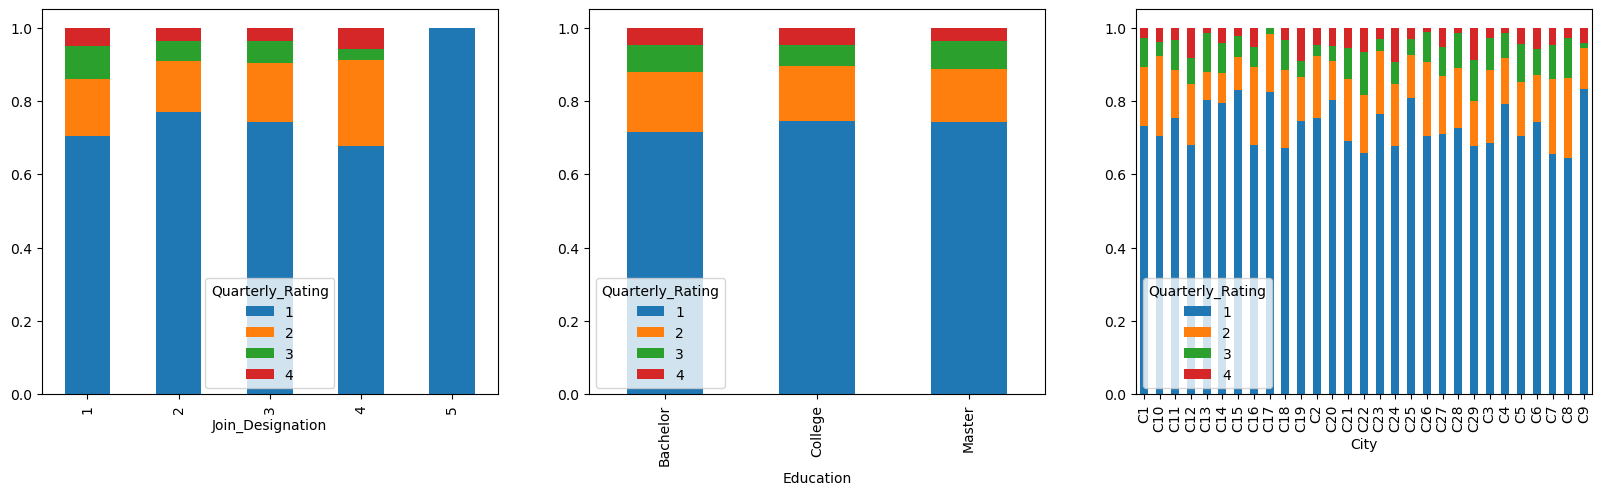

In [302]:
row, col = 1, len(categorical_selected)
fig, ax = plt.subplots(row, col, figsize=(20,5))

for i in range(col):
    feature = categorical_selected[::-1][i]
    ax = plt.subplot(row, col, i+1)
    pd.crosstab(df[feature], df["Quarterly_Rating"], normalize="index").plot.bar(stacked=True, ax=ax)

categorical_selected.remove("Education")
categorical_selected.remove("City")
categorical_selected += ["Designation"]

print(f"Selected Categorical Variables: {categorical_selected}")

##### **Age**, **Salary** & **Time Worked**

These numerical variables have yet to be investigated for a potential relationship with `Quarterly_Rating`

We first want to check if each variable is correlated with `Quarterly_Rating`. We can assess this visually if the median values along with the IQR increase or decrease between each class.

**Observation:**
- For `Age`
    -  The median value of `Age` increases across each ratings 1, 2 & 3 and stays the same between ratings 3 & 4
- For `Salary`
    -  The median value of `Salary` increases between ratings 1 & 2 and 3 & 4 but decreases between ratings 2 & 3
- For `Time_Worked`
    -  The median value of `Time_Worked` increases across all ratings

**Conclusion:**
- We will **keep** `Age` and `Time_Worked` as features.

Variables to Keep: ['Age', 'Time_Worked']


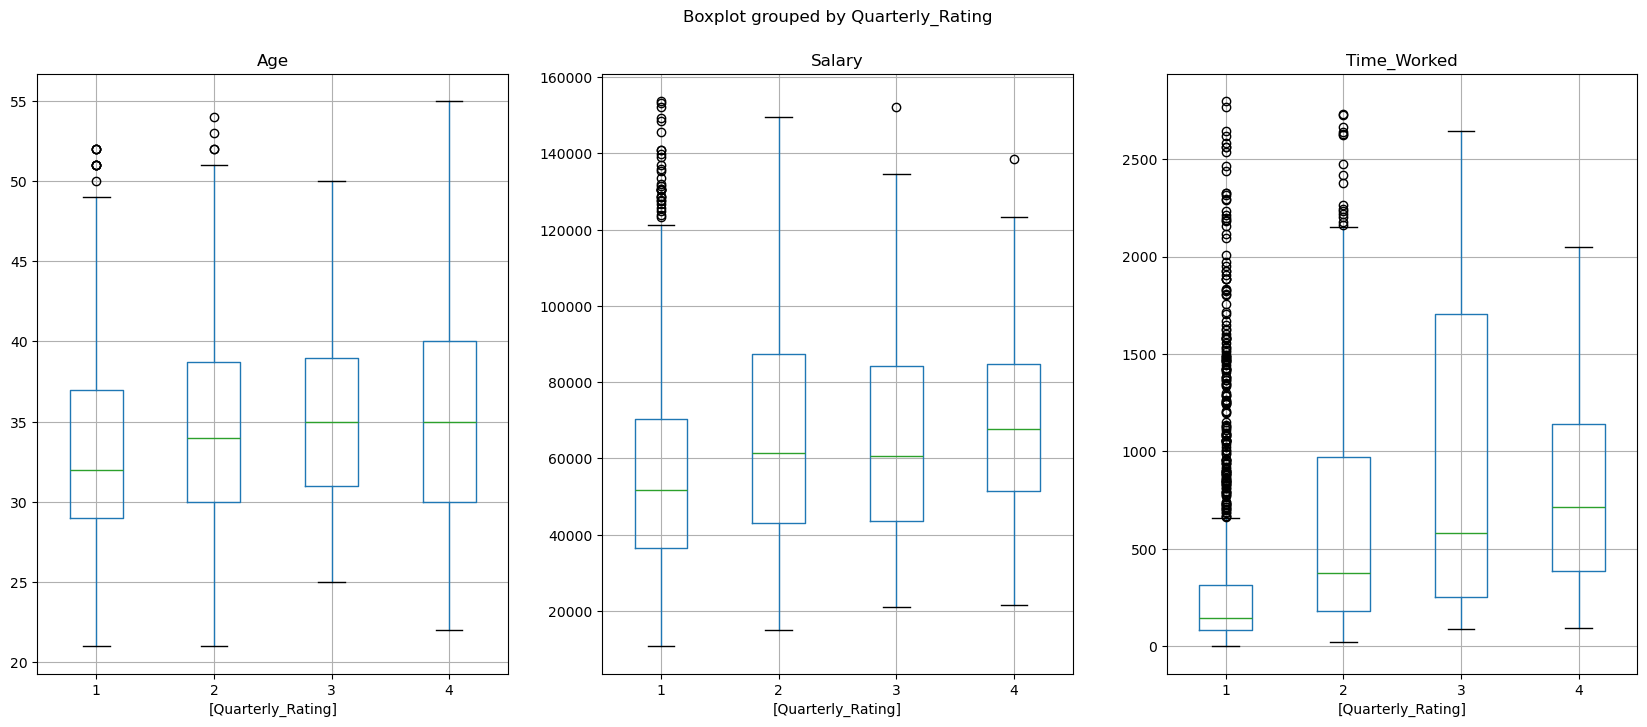

In [303]:
numerical_candidates = ["Age", "Salary", "Time_Worked"]

row, col = 1, len(numerical_candidates)
fig, ax = plt.subplots(row, col, figsize=(20,8))

for i in range(col):
    feature = numerical_candidates[i]
    ax = plt.subplot(row, col, i+1)
    ax.set_title(feature)
    df[['Quarterly_Rating',feature]].boxplot(by='Quarterly_Rating', ax=ax)

numerical_candidates.remove("Salary")               # Exclude Salary from selection
numerical_selected = numerical_candidates           
print(f"Variables to Keep: {numerical_selected}")

plt.show()

We next want to check whether our selected categorical features are not correlated amongst each other. Any feature that is correlated to others will be redundant and should be removed. We can assess this visually using a correlation table and identify the features are correlated.

**Observations:**
- `Time_Worked` and `Total_Sales_Acquired` appear highly correlated to each other. We had [previously](#part3c10) calculated that its correlation is `0.688`.

**Conclusion:**
- We will **exclude** `Time_Worked` as a feature since it is redundant to include it with `Total_Sales_Acquired`

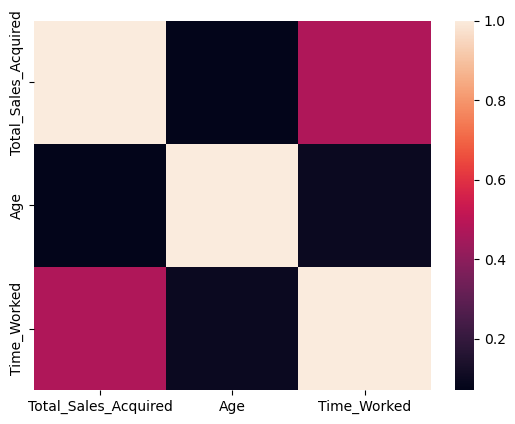

Selected Numerical Variables: ['Total_Sales_Acquired', 'Age']


In [304]:
numerical_selected = ["Total_Sales_Acquired"] + numerical_candidates   
r2 = df[numerical_selected].corr()**2
sns.heatmap(r2)
plt.show()

numerical_selected.remove('Time_Worked')
print(f"Selected Numerical Variables: {numerical_selected}")

##### **Selected Features**

In summary, we opted to select `Age`, `Join_Designation`, `Designation` and `Total_Sales_Acquired` as features to predict `Quarterly_Rating`

In [305]:
features_selected =  categorical_selected + numerical_selected

print(f"Features Selected: {features_selected}")

Features Selected: ['Join_Designation', 'Designation', 'Total_Sales_Acquired', 'Age']


#### **b.** Split the dataset into train and test sets. Describe how you split step by step.<a id="part5b"></a>

1. Split the dataset into the selected features (X) and the response variable (y).

2. Apply `train_test_split(...)` to divide data 75% as train set and 25% as test set.

3. Use `stratify` parameter to maintain distribution of `Quarterly_Rating` in both train and test set as `Quarterly_Rating` is highly imbalanced. (<i>[Stojiljković, 2025](#citation1); [Feki, 2022](#citation2)</i>)

4. Set `random_state` to ensure dataset split is reproducible.


In [306]:
from sklearn.model_selection import train_test_split

X = df[features_selected]                               # X refers to our features
y = df[["Quarterly_Rating"]].squeeze()                  # y refers to our response

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,     # 75% as train & 25% as test
                                                    stratify=y,         # Keeps class proportion of Quarterly_Rating
                                                    random_state=51)    # Reproducibility of result

#### **c.** State the model(s) you will train, and explain your choice(s), in **no more than 50 words per model**. You only need to train one model, but if you do train more models, limit yourself to no more than three---Grading is based on the validity and soundness of your model, rather than the quantity. <a id="part5c"></a>

We chose `GaussianNB` and `LogisticRegression`

`GaussianNB` is fast, simple and effective for high-dimensional data. It assumes conditional independence and normal distribution, making it ideal for text classification and real-time predictions. It performs well even with small datasets and handles noise robustly.

`LogisticRegression` is efficient, easy to implement, and ideal for both binary class and multi-class classification. It makes a strong baseline model for many classification problems as it is interpretable and efficient for linearly separable classes.

#### **d.** For each model, perform the training, and report the trained parameters and the training scores, if applicable. <a id="part5d"></a>

##### **Gaussian NB** 

In [307]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
model1 = NB.fit(X_train, y_train)

##### **Logistic Regression**

**Parameters**
- `class_weight = 'balanced'`
    - To "<i>automatically adjust weights inversely proportional to class frequencies</i>" as `Quarterly_Rating` is highly imbalanced (<i>[scikit, N.D.](#citation3); [Gusarova, 2022](#citation4)</i>)

In [308]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(class_weight='balanced')
model2 = LR.fit(X_train, y_train)

---
### 3. Model Evaluation and Selection [30% of Part II] <a id="part6"></a>
a. [Prediction](#part6a) <br>
b. [Evaluation](#part6b) <br>
c. [Final Model](#part6c) 

_[(Back Top)](#menu)_

#### **a.** For each model, predict the response variable on the test set. <a id="part6a"></a>

##### **Gaussian NB** 

In [309]:
y_pred1 = model1.predict(X_test)

results1 = X_test.copy()                    # Display features, predicted QR & true QR
results1['Predicted QR'] = y_pred1
results1['True QR'] = y_test 
results1.sample(10, random_state=51)

,Join_Designation,Designation,Total_Sales_Acquired,Age,Predicted QR,True QR
1230,3,3,4769510,45,1,4
1114,1,1,0,28,1,1
986,1,3,23381570,30,2,1
1334,1,1,0,23,1,1
1553,3,3,1314850,34,1,2
471,3,3,0,31,1,1
1144,2,2,551530,36,1,1
1051,2,2,3980440,32,1,1
1098,1,1,5565420,37,1,3
1580,1,4,20351490,50,2,3


##### **Logistic Regression**

In [310]:
y_pred2 = model2.predict(X_test)

results2 = X_test.copy()                    # Display features, predicted QR & true QR
results2['Predicted QR'] = y_pred2
results2['True QR'] = y_test 
results2.sample(10, random_state=51)

,Join_Designation,Designation,Total_Sales_Acquired,Age,Predicted QR,True QR
1230,3,3,4769510,45,1,4
1114,1,1,0,28,1,1
986,1,3,23381570,30,4,1
1334,1,1,0,23,1,1
1553,3,3,1314850,34,1,2
471,3,3,0,31,1,1
1144,2,2,551530,36,1,1
1051,2,2,3980440,32,2,1
1098,1,1,5565420,37,2,3
1580,1,4,20351490,50,3,3


#### **b.** Describe the metric you use to evaluate your model(s). Report the test scores for each model. <a id="part6b"></a>

**Evaluation Metrics:**
- **Accuracy**: Measures the total correct predictions out of all predictions made. It is intuitive but may be misleading for imbalanced sets.  
- **Precision**: Measures how many of the predicted positive labels were actually correct. High precistion means fewer false positives.  
- **Recall**: Measures how many of the predicted positive labels were correctly predicted. Higher recall reate means fewer false negatives.  
- **F1 Score**: Harmonic mean of precision and recall. It balances the two metrics and is especially useful for imbalanced datasets.  
<p></p>

- **Weighted Average**: Accounts proportion of each rating in final evaluation. This is useful due to the imbalanced dataset. ([Evidently AI, N.D.](#citation5))
- <i>**Macro Average**: Treats each rating equally important in final evaluation. However, this may worsen models' performance due to the imbalanced dataset</i>

<table style="border-collapse: collapse; font-family: Arial; font-size: 14px;">
    <thead>
        <tr style="background-color: #3498db; color: white;">
            <th style="border: 1px solid #ddd; padding: 8px;">Metric</th>
            <th style="border: 1px solid #ddd; padding: 8px;">GaussianNB</th>
            <th style="border: 1px solid #ddd; padding: 8px;">LogisticRegression</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="border: 1px solid #ddd; padding: 8px;">Accuracy</td>
            <td style="border: 1px solid #ddd; padding: 8px;">0.741</td>
            <td style="border: 1px solid #ddd; padding: 8px;">0.720</td>
        </tr>
        <tr>
            <td style="border: 1px solid #ddd; padding: 8px;">Precision (Weighted)</td>
            <td style="border: 1px solid #ddd; padding: 8px;">0.635</td>
            <td style="border: 1px solid #ddd; padding: 8px;">0.724</td>
        </tr>
        <tr>
            <td style="border: 1px solid #ddd; padding: 8px;">Recall (Weighted)</td>
            <td style="border: 1px solid #ddd; padding: 8px;">0.741</td>
            <td style="border: 1px solid #ddd; padding: 8px;">0.720</td>
        </tr>
        <tr>
            <td style="border: 1px solid #ddd; padding: 8px;">F1 Score (Weighted)</td>
            <td style="border: 1px solid #ddd; padding: 8px;">0.679</td>
            <td style="border: 1px solid #ddd; padding: 8px;">0.720</td>
        </tr>
    </tbody>
</table>

In [311]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
def evaluate(prediction):
    target_names = ['QR1', 'QR2', 'QR3', 'QR4']
    print(classification_report(y_test, prediction, target_names=target_names, digits=3, zero_division=0))  # display 3dp; suppress zero division error

    # cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, prediction), display_labels = ['QR1','QR2','QR3','QR4'])
    # cm_display.plot()
    # plt.show()  

##### **Gaussian NB** 

In [312]:
evaluate(y_pred1)

              precision    recall  f1-score   support

         QR1      0.803     0.975     0.881       394
         QR2      0.244     0.123     0.164        81
         QR3      0.000     0.000     0.000        38
         QR4      0.176     0.130     0.150        23

    accuracy                          0.741       536
   macro avg      0.306     0.307     0.299       536
weighted avg      0.635     0.741     0.679       536



##### **Logistic Regression**

In [313]:
evaluate(y_pred2)

              precision    recall  f1-score   support

         QR1      0.880     0.878     0.879       394
         QR2      0.263     0.247     0.255        81
         QR3      0.370     0.263     0.308        38
         QR4      0.250     0.435     0.317        23

    accuracy                          0.720       536
   macro avg      0.441     0.456     0.440       536
weighted avg      0.724     0.720     0.720       536



#### **c.** If you trained more than one model, identify the final model you would choose for the prediction task, and explain your choice, **in no more than 50 words**. <a id="part6c"></a>

<div style="text-align: justify;">

We chose `LogisticRegression` due to its higher F1-score, even though its accuracy is lower. 

The [visualisation](#part3b13) of `Quarterly_Rating` revealed a strong skew towards rating 1. 

This imbalance therefore makes accuracy a misleading metric while F1-score balances class weightage, precision and recall, better reflecting the model’s performance across all ratings.
</div>

---
### 4. Findings and Conclusion [20% of Part II] <a id="part7"></a>
a. [Interpretation](#part7a) <br>
b. [Lesson Learnt](#part7b) 

_[(Back Top)](#menu)_

#### **a.** Interpret what your model is implying, and summarize any insight you have drawn from the project. Explain if it is consistent with intuition, and if not, provide a plausible justification. Limit your entire response to **50 words**. <a id="part7a"></a>

<div style="text-align: justify;">

LogisticRegression has an accuracy and F1-score of 0.720 as factors outside the dataset (team collaboration, customer feedback, etc) likely influence `Quarterly_Rating`.

Despite high overall F1-score, the model underperformed on ratings 2, 3, and 4, likely due to underrepresentation in the dataset, leading to insufficient training data for the model. 

</div>

#### **b.** Share any lesson you have learned from the project, in **no more than 50 words**. <a id="part7b"></a>

We learnt the importance of selecting appropriate features for regression and classification. For instance, categorical features with dominant modes over 50% may need to be discarded, as they can skew the model and lead to misleading or inaccurate predictions.

---
### 5. Non-technical Protocol [5% of Part II] <a id="part8"></a>
a. [Contribution](#part8a) <br>
b. [References](#part8b) 

_[(Back Top)](#menu)_

#### **a.** Describe the detailed contribution of each team member, including both the tangible (e.g., implementation, testing, writing) and intangible (e.g., generating ideas, planning, leadership) efforts. <a id="part8a"></a>

**Bryan**:
- Wrote the majority of the preliminary code throughout the project
- Formatted the Jupyter Notebook to be more navigable and readable
- Have been very active and guided group discussions, generating ideas to approach the project 
- Was in charge of Part I - 2a, 2b, 2c and Part II - 2a, 2b, 3a, 3b
- Verified whether explanations are logically and technically sound
- Invested a considerable amount of time into experimenting and researching code needed for this project

**Qi Long**:
- Helped to investigate the relationships between `Gender & Sales`, `City & Sales`, `(Last Work Date - Join Date) & Sales` for Part I - 3c.
    - Managed to find the independence between the features of Gender and Sales, as well as find the moderately Strong correlation that both City and (Last Work Date - Join Date) have with the feature Sales.
- Worked together with teammates to find any inconsistencies that may have been overlooked and ensure that there was no error in the inputs of data.
- Have been very active in the discussions on what kind of models should be used
    - Helped write and advocate the models, `LogisticRegression` and `DecisionTreeClassifier` taking into account that the data was imbalanced for `Quarterly_Rating` and that `DecisionTreeClassfier` does not assume independence between features and allows us to get a fairly accurate model given that there is some correlation between the features that are chosen.
- Very diligent in doing his part and always ensures that his work doing the project is submitted timely so as to not delay the completion of the project.


**Zachary**:
- Created the GitHub repository for us to have a common workspace to work on.
- Taught the rest how to navigate and use GitHub for this project.
- Managed and troubleshooted the GitHub commits and conflicts.
- Have been very active in group discussions and provided insights into our discussions.
- Helped to investigate the relationships between `Age & Salary`, `City & Salary`, `Designation & Sales` for Part I -3c.
- Helped test the other's code and debug small bugs and oversights
- Worked on part 3c to explain how we finalised a model out of the 2 models we chose based on careful analysis and considerations.


**Swayam**:  
- Consistently volunteered to double check the explanations and code throughout the project.
- Did the preliminary code and explanations in Part I - 3A and 3B
- Helped to investigate the relationships between `Designation & Quarterly Rating`, `Sales & Quarterly Rating` for Part I -3c.
- Wrote the preliminary explanations throughout Part II - 3b, 3c, 4a, 4b, constantly refining the explanations based on the other's feedback.
- Have been very active in group discussions

**Jonathan**:
- Initiated and organised our Zoom meetings
- Have been very active in group discussions
- Wrote additional preliminary code throughout the project, such as in Feature Creation.
- Helped to investigate the relationships between `Education & Join Designation`, `Age & Designation`, `City & Promotion`, `Time Worked & Promotion` for Part I -3c.
- Wrote preliminary texts for Part II - 1a to 1d
- Helped to ensure that all data we got were logical and sound.

#### **b.** List any references and sources you have cited. <a id="part8"></a>

1. Stojiljković, M. (2025, January 29). Split Your Dataset With scikit-learn's train_test_split(). Real Python. https://realpython.com/train-test-split-python-data/#the-importance-of-data-splitting <a id="citation1"></a>

2. Feki, R. (2022, January 3). Imbalanced data: best practices. Medium. https://rihab-feki.medium.com/imbalanced-data-best-practices-f3b6d0999f38 <a id="citation2"></a>

3. scikit. (N.D.). LogisticRegression. scikit. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html <a id="citation3"></a>

4. Gusarova, M. (2022, October 7). How to improve logistic regression in imbalanced data with class weights. Medium. https://medium.com/@data.science.enthusiast/how-to-improve-logistic-regression-in-imbalanced-data-with-class-weights-1693719136aa <a id="citation4"></a>

5. Evidently AI. (N.D.). Accuracy, precision, and recall in multi-class classification. Evidently AI. https://www.evidentlyai.com/classification-metrics/multi-class-metrics#accuracy-precision-and-recall-in-python <a id="citation5"></a>